In [1]:
%matplotlib inline
import pickle
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
import os
import pandas as pd
import sys
sys.path.append("/home/konajain/code")
from scipy import stats

# Fitted Results Visualization

In [2]:
cols = ["lo_deep_Ask", "co_deep_Ask", "lo_top_Ask","co_top_Ask", "mo_Ask", "lo_inspread_Ask" ,
            "lo_inspread_Bid" , "mo_Bid", "co_top_Bid", "lo_top_Bid", "co_deep_Bid","lo_deep_Bid" ]

In [3]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10", "rb") as f:
    params = pickle.load(f)
with open("/SAN/fca/Konark_PhD_Experiments/extracted/AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD", "rb") as f:
    tod = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/SAN/fca/Konark_PhD_Experiments/extracted/AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD'

In [ ]:
p = np.array([])
n = np.array(13*[0.])
fig = plt.figure()
for k, v in tod.items():
    # if "Ask" in k: continue
    if "deep" in k: continue
    # if "inspread" in k: continue
    vals = np.array([params[k]*v[i] for i in range(13)])
    if "lo_top" in k: p = vals
    if ("mo" in k)or("co" in k): n += vals
    plt.plot(np.arange(13), vals, label = k)
plt.legend()

In [701]:
(p - n)

array([-6.99112811, -6.0678536 , -5.29207647, -4.83815709, -4.39244678,
       -3.82308168, -3.42273501, -3.19130469, -3.1599383 , -3.41559779,
       -3.53079345, -3.8493933 , -6.4846426 ])

In [518]:
import copy
paramsNew = copy.deepcopy(params)

In [521]:
paramsNew['lo_top_Ask'] =paramsNew['lo_top_Ask'] - 0.15
paramsNew['lo_top_Bid'] =paramsNew['lo_top_Bid'] - 0.15

In [522]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/INTC.OQ_ParamsInferredWCutoff_2019-01-02_2019-12-31_CLSLogLin_10_lo_modified", "wb") as f:
    pickle.dump(paramsNew, f)

In [525]:
params['lo_top_Ask']

0.725579372242616

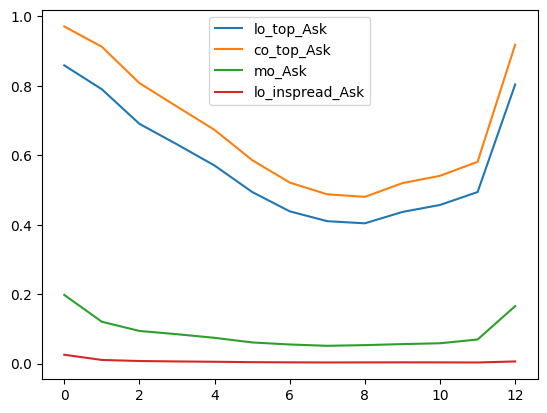

In [523]:
p = np.array([])
n = np.array(13*[0.])
fig = plt.figure()
for k, v in tod.items():
    if "Bid" in k: continue
    if "deep" in k: continue
    # if "inspread" in k: continue
    vals = np.array([paramsNew[k]*v[i] for i in range(13)])
    if "lo_top" in k: p = vals
    if ("mo" in k)or("co" in k): n += vals
    plt.plot(np.arange(13), vals, label = k)
plt.legend()

In [520]:
(p - n)

array([-0.08612198, -0.03706629, -0.03151599, -0.02895152, -0.02841951,
       -0.02401373, -0.02363622, -0.02187397, -0.02421548, -0.02540099,
       -0.02354785, -0.02794937, -0.07088825])

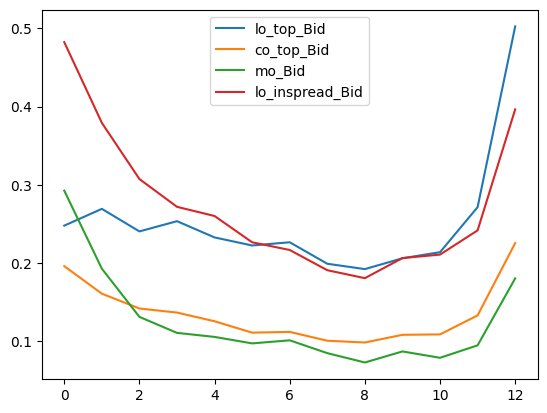

In [30]:
fig = plt.figure()
for k, v in tod.items():
    if "Ask" in k: continue
    if "deep" in k: continue
    # if "inspread" in k: continue
    vals = [params[k]*v[i] for i in range(13)]
    plt.plot(np.arange(13), vals, label = k)
plt.legend()

In [42]:
tod['lo_top_Ask'][0]

1.492585500582637

In [15]:
# tod['lo_top_Ask'][0] = 1.465
# tod['lo_top_Bid'][0] = 1.465
for k,v in tod['lo_top_Ask'].items():
    tod['lo_top_Ask'][k] = v/np.average(list(tod['lo_top_Ask'].values()))
# for k,v in tod['lo_top_Bid'].items():
#     tod['lo_top_Bid'][k] = v/np.average(list(tod['lo_top_Bid'].values()))
# print(np.average(list(tod['lo_top_Bid'].values())))

0.9981519136081682


In [722]:
for c in ["lo_deep_", "co_deep_", "lo_top_","co_top_", "mo_", "lo_inspread_" ]:
    c1 = c + "Ask"
    c2 = c+"Bid"
    for k in tod[c1].keys():
        tod[c1][k] = (tod[c1][k]+tod[c2][k])*0.5
        tod[c2][k] = tod[c1][k]
    for k,v in tod[c1].items():
        tod[c1][k] = v/np.average(list(tod[c1].values()))
        tod[c2][k] = v/np.average(list(tod[c1].values()))

In [723]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/TSLA.OQ_Params_2019-01-02_2019-12-30_dictTOD_symmetric", "wb") as f:
    pickle.dump(tod, f)

In [21]:
faketod = {}
for k, v in tod.items():
    faketod[k] = {}
    for k1, v1 in v.items():
        faketod[k][k1] = 1.0
with open("/SAN/fca/Konark_PhD_Experiments/extracted/INTC.OQ_Params_2019-01-02_2019-03-29_dictTOD_constt", "wb") as f:
    pickle.dump(faketod, f)

In [739]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/INTC.OQ_ParamsInferredWCutoffEyeMu_sparseInfer_Symm_2019-01-02_2019-12-31_CLSLogLin_10", "rb") as f:
    params = pickle.load(f)
with open("/SAN/fca/Konark_PhD_Experiments/extracted/AMZN.OQ_Params_2019-01-02_2019-12-31_dictTOD", "rb") as f:
    tod = pickle.load(f)

In [740]:
params['co_deep_Ask->lo_top_Ask']

(-1.0, array([5.09183127e+03, 2.00020248e+00, 9.35596958e+03]))

In [4]:
mat = np.zeros((12,12))
for i in range(12):
        for j in range(12):
            kernelParams = params.get(cols[i] + "->" + cols[j], None)
            if kernelParams is None: continue
            if np.isnan(kernelParams[1][2]): continue
            mat[i][j]  = kernelParams[0]*kernelParams[1][0]/((-1 + kernelParams[1][1])*kernelParams[1][2]) # alpha/(beta -1)*gamma]
# mat[:,5] = mat[:,5]*(0.0101)**0.941
# mat[:,6] = mat[:,6]*(0.0101)**0.941

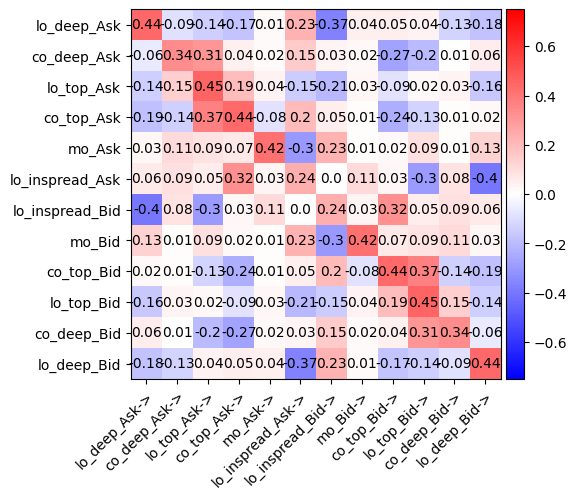

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vmin=-.75, vcenter=0., vmax=.75)
im = ax.imshow(mat.transpose(), cmap="bwr", norm=divnorm)
# im = ax.imshow(mat.transpose(), cmap='coolwarm')
fig.colorbar(im, cax=cax, orientation='vertical')
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(cols)), labels=[c +"->" for c in cols])
ax.set_yticks(np.arange(len(cols)), labels=cols)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cols)):
    for j in range(len(cols)):
        text = ax.text(i,j, np.round(mat[i][j], decimals=2),
                               ha="center", va="center")
fig.savefig("/SAN/fca/Konark_PhD_Experiments/results/AMZN.OQ_2019-01-02_2019-12-31_kernelNormMatrix_symm.png", bbox_inches="tight")
plt.show()


In [577]:
l = np.array([0.9820549276947381, 1.6868102645116865, 6.920056912545064, 5.9165301575728115, 0.5574360999716449, 0.13281990521327014, 0.13367845424717462, 0.5545163446348281, 5.9154143881395065, 6.917943654555029, 1.648668529995544, 0.9609922226272937])
np.dot(np.eye(len(cols)) - mat.transpose(), l.transpose())

array([0.44651206, 0.98819492, 2.89778416, 3.36646883, 0.57573084,
       0.1767145 , 0.08782598, 0.24548753, 3.28700461, 3.05788425,
       0.92504875, 0.45845852])

In [529]:
for c in cols:
    print(c, params[c])

lo_deep_Ask 0.0867122868767477
co_deep_Ask 0.1530880142053382
lo_top_Ask 0.725579372242616
co_top_Ask 0.6725337960877579
mo_Ask 0.08793797151431929
lo_inspread_Ask 0.006745742100505296
lo_inspread_Bid 0.006745742100505296
mo_Bid 0.08793797151431929
co_top_Bid 0.6725337960877579
lo_top_Bid 0.725579372242616
co_deep_Bid 0.1530880142053382
lo_deep_Bid 0.0867122868767477


In [621]:
params

{'lo_deep_Ask': 0.8607102465166327,
 'lo_deep_Ask->lo_deep_Ask': (1.0,
  array([8.90743673e+02, 1.70000000e+00, 3.33506676e+03])),
 'co_deep_Ask->lo_deep_Ask': (-1.0,
  array([1.70375138e+02, 1.70000000e+00, 2.20901789e+03])),
 'lo_top_Ask->lo_deep_Ask': (1.0,
  array([2.33928378e+02, 1.70000000e+00, 2.08736369e+03])),
 'co_top_Ask->lo_deep_Ask': (1.0,
  array([4.61454394e+02, 1.70000000e+00, 2.65637531e+03])),
 'mo_Ask->lo_deep_Ask': (-1.0,
  array([1.92547820e+02, 1.70000000e+00, 2.08663589e+03])),
 'lo_inspread_Ask->lo_deep_Ask': (1.0,
  array([1.58071591e+03, 1.73207521e+00, 8.09942289e+03])),
 'lo_inspread_Bid->lo_deep_Ask': (-1.0,
  array([5.87157781e+02, 1.70000000e+00, 2.48632878e+03])),
 'mo_Bid->lo_deep_Ask': (-1.0,
  array([2.53377989e+02, 1.70000000e+00, 4.20639537e+03])),
 'co_top_Bid->lo_deep_Ask': (1.0,
  array([1.19643022e+02, 1.70000000e+00, 3.28159715e+03])),
 'lo_top_Bid->lo_deep_Ask': (1.0, array([0.00501863, 1.7       , 0.23098166])),
 'co_deep_Bid->lo_deep_Ask': (

In [620]:
t  = 10
params[c+"->"+c][1][0]*(1 + params[c+"->"+c][1][2]*t)**(-1*params[c+"->"+c][1][1])

2.0938519054087057e-05

In [14]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/INTC.OQ_ParamsInferredWCutoff_2019-01-02_2019-03-31_poisson", "rb") as f:
    poisson_params = pickle.load(f)

In [15]:
poisson_params

{'lo_deep_Ask': 1.3291742343304844,
 'co_deep_Ask': 2.2448482015669513,
 'lo_top_Ask': 7.89707621082621,
 'co_top_Ask': 6.617852118945869,
 'mo_Ask': 0.5408440170940172,
 'lo_inspread_Ask': 0.1327911324786325,
 'lo_inspread_Bid': 0.1327911324786325,
 'mo_Bid': 0.5408440170940172,
 'co_top_Bid': 6.617852118945869,
 'lo_top_Bid': 7.89707621082621,
 'co_deep_Bid': 2.2448482015669513,
 'lo_deep_Bid': 1.3291742343304844}

In [42]:
avgLambdaArr = np.array([1.9273972715318866, 2.4140811965811966, 4.618395792241945, 4.459412393162392, 1.0594575936883628, 1.0259779750164364, 1.0003706443129519, 1.1384771531886917, 4.037223865877713, 4.167174556213017, 2.286552432610125, 1.8956147271531887])

In [149]:
avgSpread = 0.0167
spreadBeta = 0.7479
with open("/SAN/fca/Konark_PhD_Experiments/extracted/AAPL.OQ_Params_2019-11-14_2019-11-14_IS_osqpSparse_bounds", "rb") as f:
    v = pickle.load(f)
    theta1, theta2, theta3 = v
    thetas = np.hstack([theta2.transpose()[:,:5], theta1.transpose(), theta3.transpose(), theta2.transpose()[:,5:]])

In [150]:
theta = thetas
norms = {}
res = {}
for i, col in zip(np.arange(12), cols):
            exo = theta[0,i]
            phi = theta[1:,i]
            phi = phi.reshape((len(phi)//12,12))
            num_datapoints = (phi.shape[0] + 2)//2
            min_lag =  1e-3
            max_lag = 500
            timegridLin = np.linspace(0,min_lag, num_datapoints)
            timegridLog = np.exp(np.linspace(np.log(min_lag), np.log(max_lag), num_datapoints))
            timegrid = np.append(timegridLin[:-1], timegridLog)
            for j in range(len(cols)):
                col2 = cols[j]
                points = phi[:,j]

                timegrid_len = np.diff(timegrid)
                timegrid_mid = timegrid[:-1] + timegrid_len/2
                norms[col2 + '->' + col] = norms.get(col2 + '->' + col, []) + [points.sum()]
                points = points / timegrid_len

                res[col2 + '->' + col] =  res.get(col2 + '->' + col, []) + [(t,p) for t,p in zip(timegrid_mid[1:], points[1:])]

In [151]:
norms

{'lo_deep_Ask->lo_deep_Ask': [0.12068657342425769],
 'co_deep_Ask->lo_deep_Ask': [0.03276577577488646],
 'lo_top_Ask->lo_deep_Ask': [0.034789359439349625],
 'co_top_Ask->lo_deep_Ask': [-0.07446319743025272],
 'mo_Ask->lo_deep_Ask': [0.010607593304855258],
 'lo_inspread_Ask->lo_deep_Ask': [0.13805528545622897],
 'lo_inspread_Bid->lo_deep_Ask': [-0.11211876089958456],
 'mo_Bid->lo_deep_Ask': [-0.001289151442110617],
 'co_top_Bid->lo_deep_Ask': [0.012196798021234337],
 'lo_top_Bid->lo_deep_Ask': [-0.0823545656208503],
 'co_deep_Bid->lo_deep_Ask': [0.08942765534466954],
 'lo_deep_Bid->lo_deep_Ask': [-0.10076248190759565],
 'lo_deep_Ask->co_deep_Ask': [-0.007457055349556695],
 'co_deep_Ask->co_deep_Ask': [0.04691604683522679],
 'lo_top_Ask->co_deep_Ask': [0.34910842753081583],
 'co_top_Ask->co_deep_Ask': [-0.15152346653365933],
 'mo_Ask->co_deep_Ask': [-0.026039396574535897],
 'lo_inspread_Ask->co_deep_Ask': [0.2844984544519758],
 'lo_inspread_Bid->co_deep_Ask': [-0.11166599632106022],
 'mo

## AAPL Phis

In [551]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/INTC.OQ_Params_2019-01-02_2019-12-31_IS_osqpSparse_bounds", "rb") as f:
    thetas = pickle.load(f)
for k, v in thetas.items():
    theta1, theta2, theta3 = v
    thetas[k] = np.hstack([theta2.transpose()[:,:5], theta1.transpose()*(0.0101)**0.941, theta3.transpose()*(0.0101)**0.941, theta2.transpose()[:,5:]])
with open("/SAN/fca/Konark_PhD_Experiments/extracted/INTC.OQ_ParamsInferredWCutoff_2019-01-02_2019-12-31_CLSLogLin_10", "rb") as f:
    params = pickle.load(f)
with open("/SAN/fca/Konark_PhD_Experiments/extracted/INTC.OQ_Params_2019-01-02_2019-12-30_dictTOD", "rb") as f:
    tod = pickle.load(f)

In [552]:
# Special Date:
specDate = {
            "MEXP" : [dt.date(2019,1,18), dt.date(2019,2,15), dt.date(2019,4,18), dt.date(2019,5,17), dt.date(2019,7,19), dt.date(2019,8,16), dt.date(2019,10,18), dt.date(2019,11,15), dt.date(2020,1,17), dt.date(2020,2,21), dt.date(2020,4,17), dt.date(2020,5,15)],
            "FOMC3" : [dt.date(2019,1,30), dt.date(2019,3,20), dt.date(2019,5,1), dt.date(2019,6,19), dt.date(2019,7,31), dt.date(2019,9,18), dt.date(2019,10,30), dt.date(2019,12,11), dt.date(2020,1,29), dt.date(2020,3,18), dt.date(2020,4,29), dt.date(2020,6,10)],
            "MEND" : [dt.date(2019,1,31), dt.date(2019,4,30), dt.date(2019,5,31), dt.date(2019,10,31), dt.date(2020,1,31), dt.date(2020,4, 30)],
            "MSCIQ" : [dt.date(2019,2,28), dt.date(2019,8,27), dt.date(2020,2,28)],
            "QEXP" : [dt.date(2019,3,15), dt.date(2019,6,21), dt.date(2019,9,20), dt.date(2019,12,20), dt.date(2020,3,20), dt.date(2020,6,19) ],
            "QEND" : [dt.date(2019,3,29), dt.date(2019,6,28), dt.date(2019,9,30), dt.date(2019,12,31), dt.date(2020,3,31), dt.date(2020,6,30)],
            "MSCIS" : [dt.date(2019,5,28), dt.date(2019,11,26), dt.date(2020,5,29)],
            "HALF" : [dt.date(2019,7,3), dt.date(2019,11,29), dt.date(2019,12,24)],
            "DISRUPTION" : [dt.date(2020,3,9), dt.date(2020,3,12), dt.date(2020,3,16)],
            "RSL" : [dt.date(2020,6,26)]
            }

specDates = []
for ds in specDate.values():
            specDates += [i.strftime("%Y-%m-%d") for i in ds]

In [383]:
# thetas = {}
# with open("/SAN/fca/Konark_PhD_Experiments/extracted/AAPL.OQ_Params_2019-04-04_2019-04-04_IS_osqpSparse_bounds", "rb") as f:
#     theta1, theta2, theta3 = pickle.load(f)
#     thetas['2019-01-02'] = np.hstack([theta2.transpose()[:,:5], theta1.transpose()*(0.0169)**0.7479, theta3.transpose()*(0.0169)**0.7479, theta2.transpose()[:,5:]])

In [553]:
res = {}
norms = {}

for d, theta in thetas.items():
        if d=="2019-01-09": continue
        if d in specDates: continue
        for i, col in zip(np.arange(12), cols):
            exo = theta[0,i]
            phi = theta[1:,i]
            # res[col] = res.get(col, []) + [exo]
            phi = phi.reshape((len(phi)//12,12))
            num_datapoints = (phi.shape[0] + 2)//2
            min_lag =  1e-3
            max_lag = 500
            timegridLin = np.linspace(0,min_lag, num_datapoints)
            timegridLog = np.exp(np.linspace(np.log(min_lag), np.log(max_lag), num_datapoints))
            timegrid = np.append(timegridLin[:-1], timegridLog)
            timegrid_len = np.diff(timegrid)
            timegrid_mid = timegrid[:-1] + timegrid_len/2
            res[col] = res.get(col, []) + [exo/timegrid_len[0]]
            for j in range(len(cols)):
                col2 = cols[j]
                points = phi[:,j]
                points = points #/ timegrid_len[0]
                norms[col2 + '->' + col] = norms.get(col2 + '->' + col, []) + [points.sum()]
                
                points = points / timegrid_len
                res[col2 + '->' + col] =  res.get(col2 + '->' + col, []) + [(t,p) for t,p in zip(timegrid_mid, points)]

In [554]:
kernelParams = params['co_deep_Ask->lo_top_Ask']
kernelParams[0]*kernelParams[1][0]/((-1 + kernelParams[1][1])*kernelParams[1][2])

-0.5415829902198599

In [555]:
params['co_deep_Ask->lo_top_Ask']

(-1.0, array([1.27009381e-04, 1.70000000e+00, 3.35021549e-04]))

nan


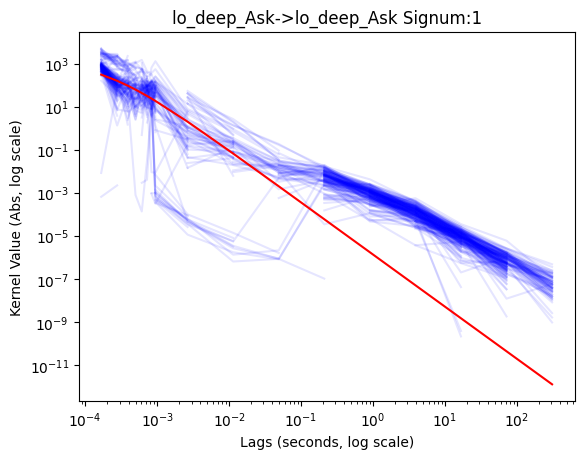

nan


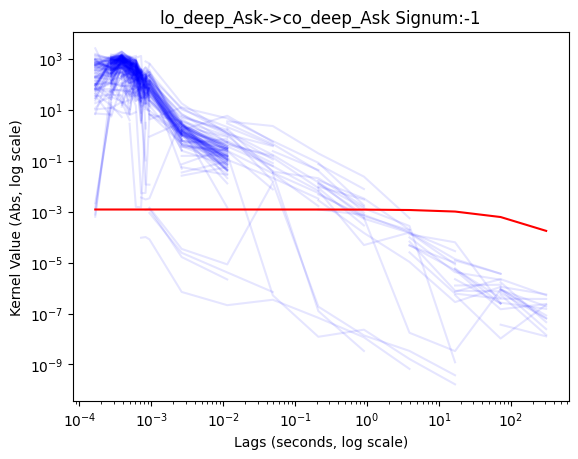

nan


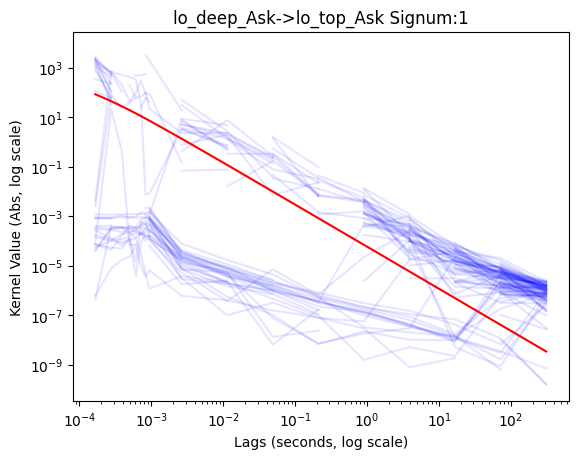

nan


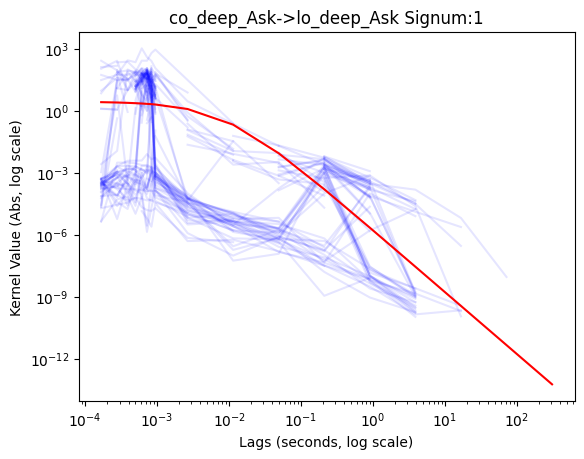

nan


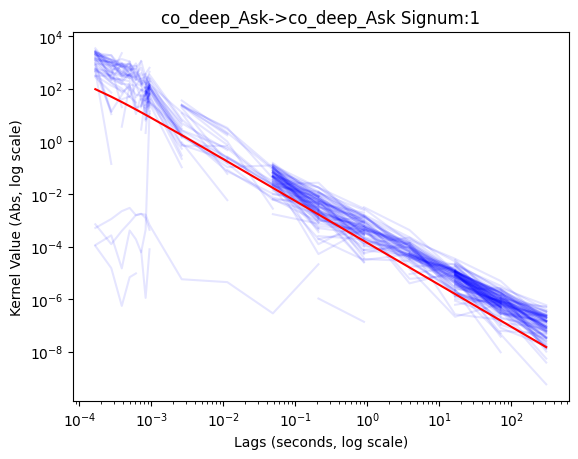

nan


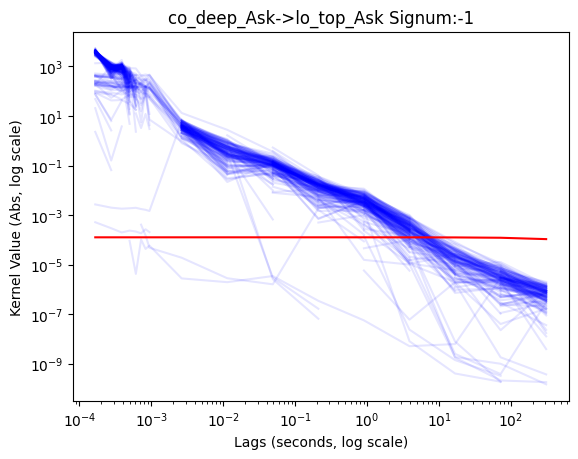

nan


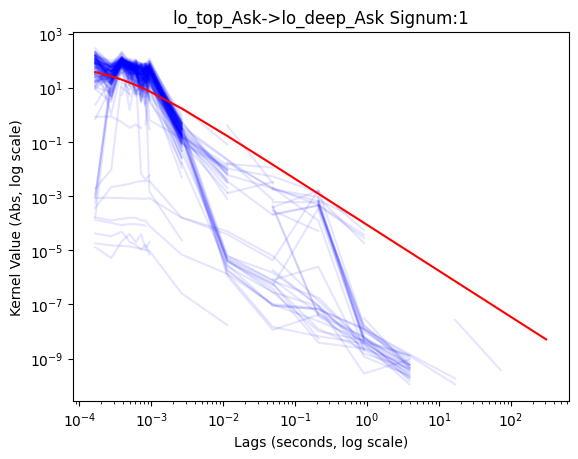

nan


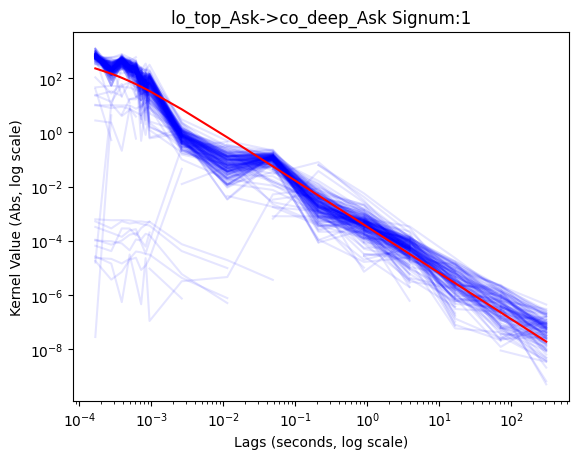

nan


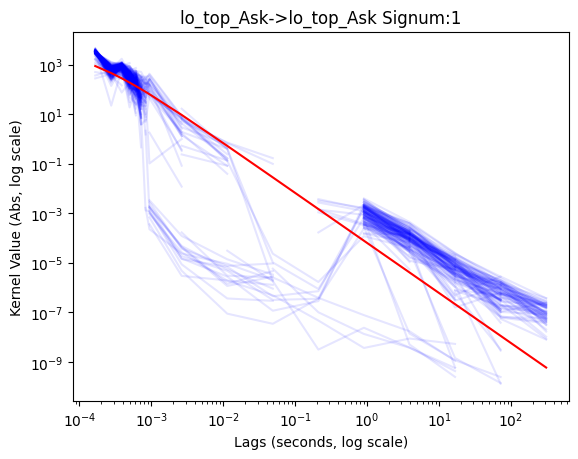

In [547]:
# with open("/SAN/fca/Konark_PhD_Experiments/extracted/AAPL.OQ_ParamsInferredWCutoff_2019-01-02_2019-03-31_CLSLogLinExp_10", "rb") as f:
#     params = pickle.load(f)

for col1 in cols[:3]:
    for col2 in cols[:3]:
        points = np.array(res[col1 + '->' + col2]).reshape((len(res[col1+'->'+col2])//18,18,2))
        # for j in range(18):
        #     t = points[:,j,1]
        #     # print(t)
        #     med = np.median(t)
        #     # print(med)
        #     # if med == np.inf:
        #     #         t = t[t != np.inf]
        #     t[t == np.inf] = 1e6
        #     if np.abs(med) < 1e-18: med = np.mean(t[(np.abs(t)>1e-18)&(t < 1e6)])
        #     t[np.abs(med/t) > 1e6] = med
        #     # t[np.abs(med/t) < 1e-6] = med
        #     # print(med)
        #     points[:,j,1] = t
        for j in range(len(res[col1+'->'+col2])//18):
                arr = points[j,:,1]
                # 1 to len -1
                arrTmp = copy.deepcopy(np.abs(arr))
                nanidxs = []
                exit= False
                while exit is False:
                    exit = True
                    for i in range(2, len(arrTmp) - 1):
                        if ((arrTmp[i-1]/arrTmp[i])/(arrTmp[i]/arrTmp[i+1]) > 1e4):
                            nanidxs.append(i)
                            arrTmp[i] = (arrTmp[i-1]+arrTmp[i+1])/2
                            exit = False
                        # elif (sum(arrTmp) > 1e-2)&((arrTmp[i-1]/arrTmp[i])/(arrTmp[i]/arrTmp[i+1]) < 1e-6):
                        #     nanidxs.append(i-1)
                        #     arrTmp[i-1] = (arrTmp[i+1])/2
                        #     exit = False
                # edges : 1 and len:
                if arrTmp[0]/arrTmp[1] < 1e-3:
                    nanidxs.append(0)
                if arrTmp[-1]/arrTmp[-2] < 1e-3:
                    nanidxs.append(len(arrTmp)-1)
                # anything near zero to nan
                points[j,np.where(arrTmp < 1e-10),1]= np.nan 
                points[j,nanidxs,1] = np.nan
        if np.nansum(points) != np.inf:
                print(points[:,:,1].sum()/len(res[col1+'->'+col2])//18)
                norms[col2 + '->' + col] = points[:,:,1].sum()/len(res[col1+'->'+col2])//18
        
        plt.figure()
        s = np.sign(np.nansum(points,axis=1)[:,1].mean())
        plt.title(col1 + '->' + col2 + " Signum:" + str(int(s)))
        for p in points:
            plt.plot(p[:,0][1:], np.abs(p[:,1][1:]), alpha = 0.1, color='b')
        if col1 + '->' + col2 in params.keys():
            kernelParams = params[col1 + '->' + col2]
            gamma = kernelParams[1][2]
            beta = kernelParams[1][1]
            # norm = np.average(norms[col1+"->"+col2])
            # if "inspread" in col2: norm = norm*(0.0169)**0.7479
            alpha = kernelParams[1][0]
            
            # time = p[:,0][1:]
            plt.plot(p[:,0][1:], np.abs(alpha/((1 + gamma*p[:,0][1:])**beta)), color = "r")
            # kernelParams2= params2[col1 + '->' + col2]
            # plt.plot(p[:,0][1:], np.abs(np.exp(kernelParams[1][0])*np.exp(p[:,0][1:]*kernelParams[1][1])), color = "orange")
        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel("Lags (seconds, log scale)") 
        plt.ylabel("Kernel Value (Abs, log scale)") 
        plt.show()



In [545]:
7596/36

211.0

In [437]:
np.mean([1/x for x in list(tod['mo_Ask'].values())])

1.181828828399474

In [397]:
arr = [ 0.00000000e+00, -1.32101330e-07, -1.65387563e-07, -1.58528782e-07,
       -1.71656467e-07, -1.75019773e-07, -1.85905639e-07, -2.15350037e-07,
       -2.04771522e-07, -1.52682938e-07, -4.70659494e-07,  8.36139524e-04,
        7.81819853e-04, -5.10660561e-06, -6.82241079e-06, -2.95000874e-06,
       -7.28259507e-08, -2.84961146e-09]

In [413]:
points = np.array(res[cols[5] + '->' + cols[5]]).reshape((216,18,2))

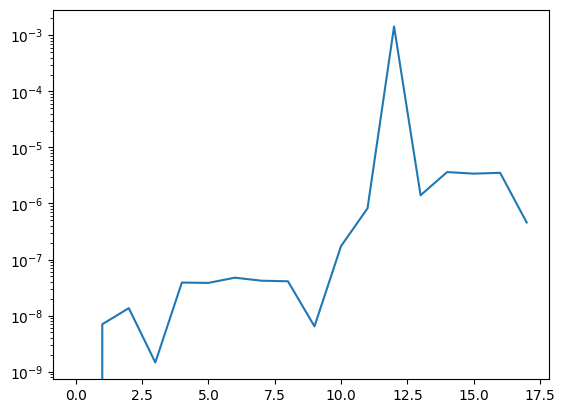

In [419]:
# arr = points[0,:,1][1:]
plt.plot(np.abs(arr))
plt.yscale("log")

In [263]:
np.where(points[:,2,1] < 1e-10) 

(array([  0,   1,   4,  11,  13,  15,  17,  18,  19,  25,  27,  28,  29,
         30,  32,  33,  34,  35,  36,  38,  40,  41,  43,  45,  48,  49,
         50,  51,  52,  55,  57,  58,  62,  63,  66,  67,  68,  69,  70,
         71,  74,  75,  76,  77,  78,  81,  82,  83,  84,  85,  87,  88,
         90,  91,  92,  93,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 109, 110, 111, 112, 113, 114, 115, 120, 121, 122, 124,
        125, 126, 127, 128, 130, 132, 133, 135, 136, 142, 144, 145, 147,
        148, 149, 151, 152, 154, 155, 156, 159, 160, 161, 162, 164, 165,
        166, 167, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180,
        182, 184, 185, 190, 191, 192, 193, 195, 196, 198, 199, 201, 204,
        205, 206, 207, 210, 211, 212, 213, 214]),)

In [264]:
points[:,2,1]

array([ 2.78561873e-22, -2.24978332e-21,  5.57155598e-03,  5.47588838e-01,
        1.12038821e-21,  5.68809462e-02,  1.93067302e-02,  1.72579288e-01,
        2.17179979e-01,  1.79167152e-04,  1.44075693e-02, -7.21974733e-02,
                   nan, -1.05386018e-01,  6.49604149e-01, -1.86602316e-02,
        2.59855283e-01, -2.13121389e-02, -1.41039989e-01,  1.87957159e-21,
        6.18382454e-01,  3.81063339e-01,  8.66467864e-02,  6.98770387e-02,
        1.27236551e-01, -5.52824314e-03,  2.01314787e-01, -1.35725026e-02,
       -3.76996700e-02, -7.71905745e-22, -8.63956839e-22,  4.84496800e-02,
       -6.15370948e-02, -2.20719518e-22,  3.97405534e-22,  6.51197153e-23,
       -2.59236679e-21,  8.87611994e-02, -3.22999285e-01,  1.13861062e-02,
       -1.08175675e-21, -1.35860633e-02,  4.42907724e-03,  1.60178806e-22,
        1.85321752e-01, -1.35076633e-21,  1.18554403e-01,  1.10001536e-01,
       -1.91275850e-22, -2.79029377e-22, -4.58814844e-02, -5.47671816e-21,
       -6.55144206e-02,  

In [213]:
import copy
print(arr)
# 1 to len -1 
arrTmp = copy.deepcopy(arr)
nanidxs = []
exit= False
while exit is False:
    exit = True
    for i in range(1, len(arrTmp) - 1):
        if (arrTmp[i-1]/arrTmp[i])/(arrTmp[i]/arrTmp[i-1]) > 1e6:
            nanidxs.append(i)
            arrTmp[i] = (arrTmp[i-1]+arrTmp[i+1])/2
            exit = False
# edges : 1 and len:
if arrTmp[0]/arrTmp[1] < 1e-3:
    nanidxs.append(0)
if arrTmp[-1]/arrTmp[-2] < 1e-3:
    nanidxs.append(len(arr)-1)

[ 2.21798065e+03  1.82664085e+02  8.34356972e+02  8.30307298e+01
  3.36632274e+02  3.10302488e+02  1.74037673e+02  1.29135203e+03
  1.11287814e+02  7.12429970e-02  2.05462921e+01  1.91826421e+01
  1.39770638e+01  9.15882548e+00 -3.51206058e-04 -3.96060479e-04
 -2.52307367e-05]


[9, 14, 15]

In [223]:
points[2,nanidxs,1] = np.nan
v = points.reshape((216*18, 2))
v[~np.isnan(v[:,1]),:].shape

(3885, 2)

In [224]:
v.shape

(3888, 2)

# read o files:

In [133]:
with open("/home/konajain/code/run/oFiles/aaplSim.o3802232.69", "rb") as f:
    txt = f.read()

In [134]:
l = txt.split(b"\n")

In [135]:
times = []
events = []
for i in range(3,len(l)):
    if b"event" in l[i]:
        times.append(float(l[i-2]))
        events.append(str(l[i+1].split(b"0")[1]))

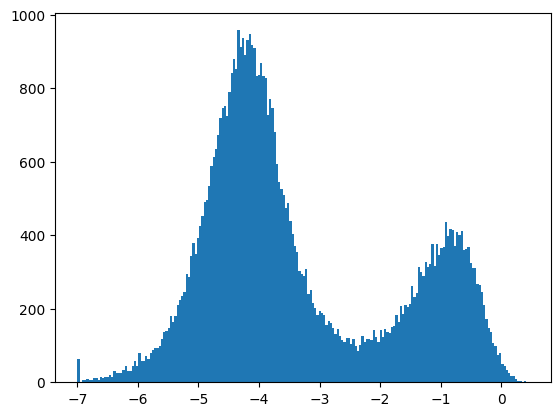

In [125]:
plt.hist(np.log(times)/np.log(10), bins = 200)
plt.show()

In [126]:
res = {}
for t, e in zip(times, events):
    res[str(e.split("  ")[1])] =res.get(str(e.split("  ")[1]), []) + [t]

In [130]:
times_emp = {}
for d in pd.date_range(dt.date(2019,1,2), dt.date(2019,2,1)):
    try:
        data = pd.read_csv("/SAN/fca/Konark_PhD_Experiments/extracted/AAPL.OQ_"+ d.strftime("%Y-%m-%d") +"_12D.csv")
    except: 
        continue
    data = data.loc[(data.Time < 1800)]
    data_times = data.groupby("event").Time.apply(lambda x: np.array(x)).to_dict()
    for k in data_times:
        tmp = times_emp.get(k, [])
        times_emp[k]=np.append(tmp, np.diff(data_times[k]) )

/home/konajain/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


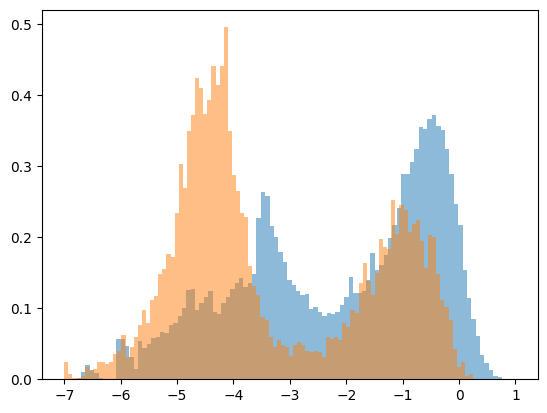

In [136]:
plt.hist(np.log(times_emp['lo_top_Bid'][times_emp['lo_top_Bid']>0])/np.log(10), bins = 100, alpha =0.5, density = True)
plt.hist(np.log(res['lo_top_Bid'])/np.log(10), bins = 100, alpha = 0.5, density= True)
plt.show()

# Bacry Baseline

In [4]:
thetas_EM = {}
for d in pd.date_range(dt.date(2019,1,2), dt.date(2019,3,31)):
    try:
        with open("/SAN/fca/Konark_PhD_Experiments/extracted/INTC.OQ_"+d.strftime("%Y-%m-%d")+"_"+d.strftime("%Y-%m-%d")+"_EMLogLin12D", "rb") as f:
            t = pickle.load(f)
        thetas_EM[d.strftime("%Y-%m-%d")] = t
    except:
        continue

In [90]:
df = pd.read_csv( "/SAN/fca/Konark_PhD_Experiments/extracted/AAPL.OQ_2019-01-02_8D_Bacry.csv")
eventOrder = df.event.sort_values().unique()

/home/konajain/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
eventOrder = ["lo_deep_Ask", "co_deep_Ask", "lo_top_Ask","co_top_Ask", "mo_Ask", "lo_inspread_Ask" ,
            "lo_inspread_Bid" , "mo_Bid", "co_top_Bid", "lo_top_Bid", "co_deep_Bid","lo_deep_Bid" ]

In [ ]:
thetas_EM

In [6]:
num_datapoints, min_lag, max_lag = 10, 1e-3, 500
timegridLin =np.linspace(0,min_lag, num_datapoints)
timegridLog = np.exp(np.linspace(np.log(min_lag), np.log(max_lag), num_datapoints))
timegrid = np.append(timegridLin[:-1], timegridLog)

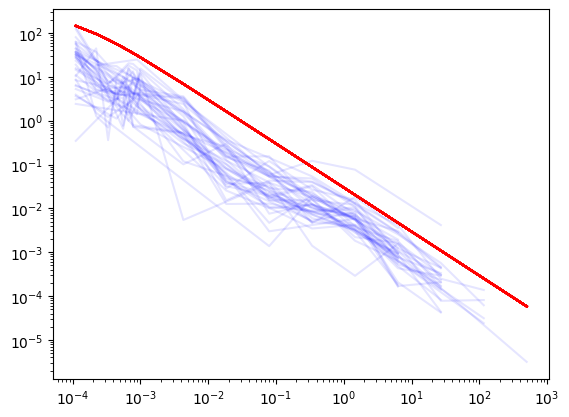

In [7]:
i, j = 7,7
ts = []
ps = []
for k, v in thetas_EM.items():
    ts.append(timegrid[1:])
    ps.append(v[2][i,j,:])
    plt.plot(timegrid[1:][v[2][i,j,:] > 1e-6], v[2][i,j,:][v[2][i,j,:] > 1e-6], alpha = 0.1, color = "b")
    # plt.plot(timegrid[1:], np.exp(-3.5340)*timegrid[1:]**(-0.9845 ), color = "r")
    # plt.plot(timegrid[1:], 350*(1 + 1000.00324738*timegrid[1:])**(-2), color = "g")
    plt.plot(timegrid[1:], np.exp(-3.514  )*(1e-4+timegrid[1:])**(-1.003 ), color = "r")
    plt.xscale("log")
    plt.yscale("log")

In [ ]:
import statsmodels.api as sm
em_params = {}
mat = np.zeros((12,12))
for i in range(12):
    for j in range(12):
        ts = []
        ps = []
        for k, v in thetas_EM.items():
            ts.append(timegrid[1:])
            ps.append(v[2][i,j,:])
        X = np.array(ts).flatten()
        Y = np.array(ps).flatten()
        Xs = sm.add_constant(np.log(1e-3+X[Y>1e-6]))
        Ys = np.hstack(np.log(Y[Y>1e-6]))
        model = sm.OLS(Ys, Xs)
        res = model.fit()
        # print(res.summary())
        thetas = res.params
        if thetas[1] > -1: thetas[1] = -1.01
        em_params[eventOrder[i] + "->" + eventOrder[j]] = thetas
        norm = np.exp(thetas[0])*((1e-3)**(1+thetas[1]))/(-1*thetas[1] -1 )
        mat[i][j] = norm
        print(eventOrder[i] + "->" + eventOrder[j], norm)
        if norm < 0.01: em_params[eventOrder[i] + "->" + eventOrder[j]]  = None
    exos = []
    for k, v in thetas_EM.items():
        exos.append(v[0][i])
    em_params[eventOrder[i]] = np.median(exos)
for k in ["lo_deep_", "co_deep_", "co_top_",  "mo_", "lo_top_", "lo_inspread_"]:
        em_params[k+"Ask"] = 0.5*(em_params[k+"Ask"]+em_params[k+"Bid"])
        em_params[k+"Bid"] = em_params[k+"Ask"]

In [14]:
for c in eventOrder:
    print(em_params[c])

0.026580395325676544
0.041428042878367405
0.2738734166936365
0.2809451691089674
0.026589894725208552
0.03370213690696146
0.03370213690696146
0.026589894725208552
0.2809451691089674
0.2738734166936365
0.041428042878367405
0.026580395325676544


In [16]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/INTC.OQ_ParamsInferredWCutoff_2019-01-02_2019-03-31_CLSLogLin_10", "rb") as f:
    params = pickle.load(f)
for c in eventOrder:
    params[c] = em_params[c]
with open("/SAN/fca/Konark_PhD_Experiments/extracted/INTC.OQ_ParamsInferredWCutoff_2019-01-02_2019-03-31_CLSLogLin_10_EMMu", "wb") as f:
    pickle.dump(params, f)

In [116]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/AAPL.OQ_ParamsInferred_2019-01-02_2019-03-31_EMBacry", "wb") as f:
    pickle.dump(em_params, f)

In [69]:
from scipy.optimize import curve_fit
def fitPowerLawCutoff(ts, ps): # a not the same as norm in calibration
        def powerLawCutoff(time, alpha, beta, gamma):
            # alpha = a*beta*(gamma - 1)
            funcEval = alpha/((1 + gamma*time)**beta)
            # funcEval[time < t0] = 0
            return funcEval
        def jac(time, alpha, beta, gamma):
            f = powerLawCutoff(time, alpha, beta, gamma)
            return np.array([f/alpha, f*(-1*np.log(1+gamma*time)), f*(-1*beta)*gamma/(1+gamma*time)]).T
        Xs = ts
        Ys = ps
        params, cov = curve_fit(powerLawCutoff, Xs, Ys, maxfev = int(1e6), jac = jac, p0 = [1000*0.7, 1.7, 1000], bounds = ([0,0,0], [np.inf, 2, np.inf])) #bounds=([0, 0], [1, 2]),
        print(params[0]/(params[2]*(params[1] - 1)))
        # print(norm)
        thetas = params
        return thetas
fitPowerLawCutoff(X[Y>1e-6],Y[Y>1e-6])

0.3507627194266916


array([350.76161435,   1.99999713, 999.99971607])

In [121]:
def simBacry(paramsPath = "/SAN/fca/Konark_PhD_Experiments/extracted/AAPL.OQ_ParamsInferred_2019-01-02_2019-03-31_EMBacry"):
    with open(paramsPath, "rb") as f:
        params = pickle.load(f)
    from tick.hawkes import SimuHawkes, HawkesKernelPowerLaw, HawkesKernel0
    cols = ['co_top_Ask', 'co_top_Bid', 'lo_top_Ask', 'lo_top_Bid', 'mo_Ask',  'mo_Bid', 'pc_Ask', 'pc_Bid']
    support = 500
    cutoff = 1e-3
    kernels = []
    baselines = []
    for i in range(len(cols)):
        t = []
        for j in range(len(cols)):
            par = params[cols[i]+"->"+cols[j]]
            if par is None:
                t.append(HawkesKernel0())
            else:
                t.append(HawkesKernelPowerLaw(np.exp(par[0]), cutoff, -1*par[1], support))
        kernels.append(t)
        baselines.append(params[cols[i]])
    hawkes = SimuHawkes(kernels=kernels, baseline=baselines,verbose=True)
    hawkes.end_time = 2300
    hawkes.simulate()
    return hawkes.timestamps
simBacry()

----------------------------------------
Launching simulation using SimuHawkes...
Done simulating using SimuHawkes in 1.65e+03 seconds.


[array([1.95051087e+00, 1.95656847e+00, 3.88991014e+00, ...,
        2.29782711e+03, 2.29801006e+03, 2.29862618e+03]),
 array([   2.86931831,    4.03282662,    4.0356531 , ..., 2298.02640911,
        2299.88428592, 2299.88490934]),
 array([   6.22107382,    8.33363253,    8.33479545, ..., 2297.69021708,
        2298.00780245, 2299.69525338]),
 array([   3.90324755,    3.90362351,    4.08615575, ..., 2297.82861583,
        2298.49745291, 2299.05207341]),
 array([  41.06542515,   55.3588695 ,   61.40732959,   61.41025054,
          61.45689216,   61.7752427 ,   75.28140876,   75.44514375,
          75.44591978,  113.87770087,  116.90688943,  152.8763815 ,
         152.92742593,  189.73036907,  194.13440123,  194.86406634,
         195.89992185,  223.78940309,  255.16011732,  289.90414087,
         313.03474073,  314.02133817,  328.60469033,  328.85569285,
         329.86482814,  330.20790678,  332.84523304,  332.88814497,
         334.32348285,  335.29155329,  336.90339729,  345.54106379

In [12]:
import pickle
import os
import numpy as np
times_Sim = {}
ric = "AAPL.OQ"
suffix = "_bacry"
dataPath = "/SAN/fca/Konark_PhD_Experiments/simulated/bacry"
cols = ['co_top_Ask', 'co_top_Bid', 'lo_top_Ask', 'lo_top_Bid', 'mo_Ask',  'mo_Bid', 'pc_Ask', 'pc_Bid']
for l in [dataPath + "/" + i for i in os.listdir(dataPath) if (ric in i)&(suffix in i)]:
    with open(l, "rb") as f:
        results = pickle.load(f)
    data_times = {}
    for k, v in zip(cols, results):
        data_times[k] = v
    for k in data_times:
        tmp = times_Sim.get(k, [])
        times_Sim[k]=np.append(tmp, np.diff(data_times[k]) )

In [21]:
import pandas as pd
import datetime as dt
times = {}
for d in pd.date_range(dt.date(2019,1,2), dt.date(2019,2,1)):
    try:
        data = pd.read_csv("/SAN/fca/Konark_PhD_Experiments/extracted/AAPL.OQ_"+ d.strftime("%Y-%m-%d") +"_8D_Bacry.csv")
    except: 
        continue
    # data = data.loc[(data.Time < 3*3600)&(data.Time > 2.5*3600)]
    data_times = data.groupby("event").Time.apply(lambda x: np.array(x)).to_dict()
    for k in data_times:
        tmp = times.get(k, [])
        times[k]=np.append(tmp, np.diff(data_times[k]) )

/home/konajain/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


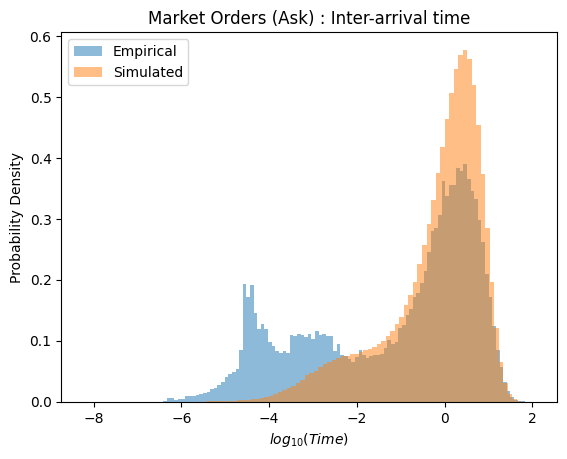

In [22]:
from matplotlib import pyplot as plt
c = "mo_Ask"
plt.hist(np.log(times[c][times[c]>0])/np.log(10), bins = 100,alpha=.5, density = True, label = "Empirical")
plt.hist(np.log(times_Sim[c])/np.log(10), bins = 100, density = True, alpha=.5, label = "Simulated")
plt.legend()
plt.title("Market Orders (Ask) : Inter-arrival time")
plt.xlabel("$log_{10}(Time)$")
plt.ylabel("Probability Density")
# plt.hist(np.log(times_exo)/np.log(10), bins = 100, density = True, alpha = .5)
# plt.yscale("log")
plt.show()

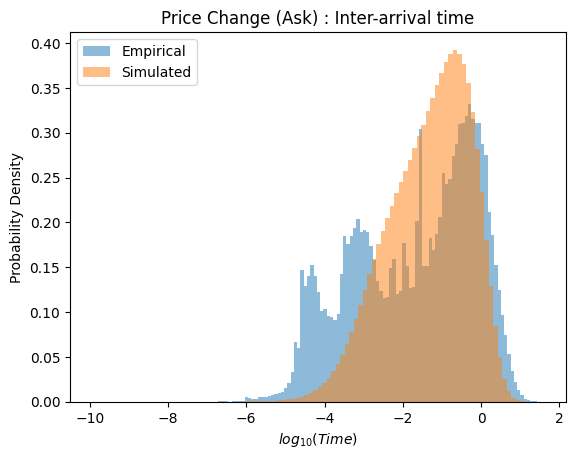

In [25]:
from matplotlib import pyplot as plt
c = "pc_Ask"
plt.hist(np.log(times[c][times[c]>0])/np.log(10), bins = 100,alpha=.5, density = True, label = "Empirical")
plt.hist(np.log(times_Sim[c])/np.log(10), bins = 100, density = True, alpha=.5, label = "Simulated")
plt.legend()
plt.title("Price Change (Ask) : Inter-arrival time")
plt.xlabel("$log_{10}(Time)$")
plt.ylabel("Probability Density")
# plt.hist(np.log(times_exo)/np.log(10), bins = 100, density = True, alpha = .5)
# plt.yscale("log")
plt.show()

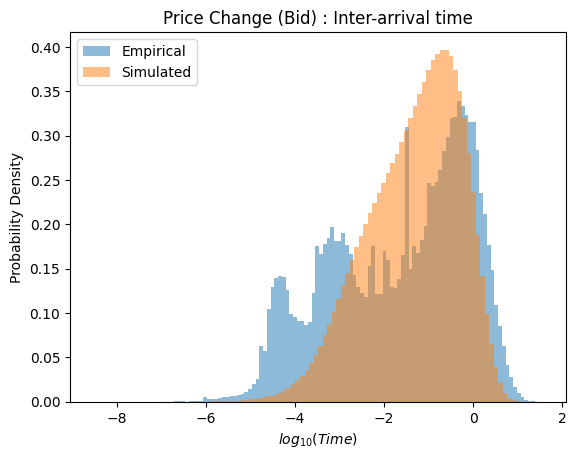

In [26]:
from matplotlib import pyplot as plt
c = "pc_Bid"
plt.hist(np.log(times[c][times[c]>0])/np.log(10), bins = 100,alpha=.5, density = True, label = "Empirical")
plt.hist(np.log(times_Sim[c])/np.log(10), bins = 100, density = True, alpha=.5, label = "Simulated")
plt.legend()
plt.title("Price Change (Bid) : Inter-arrival time")
plt.xlabel("$log_{10}(Time)$")
plt.ylabel("Probability Density")
# plt.hist(np.log(times_exo)/np.log(10), bins = 100, density = True, alpha = .5)
# plt.yscale("log")
plt.show()

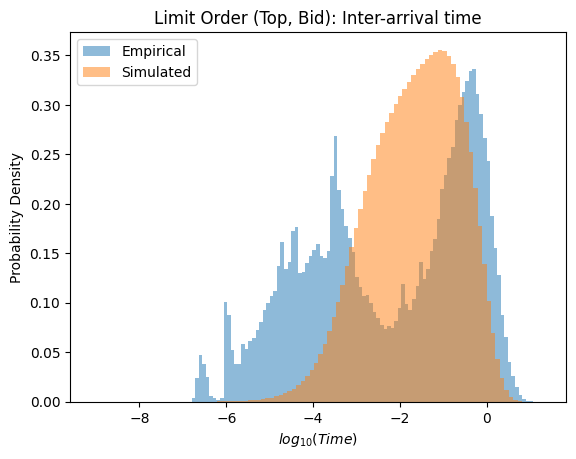

In [24]:
from matplotlib import pyplot as plt
c = "lo_top_Bid"
plt.hist(np.log(times[c][times[c]>0])/np.log(10), bins = 100,alpha=.5, density = True, label = "Empirical")
plt.hist(np.log(times_Sim[c])/np.log(10), bins = 100, density = True, alpha=.5, label = "Simulated")
plt.legend()
plt.title("Limit Order (Top, Bid): Inter-arrival time")
plt.xlabel("$log_{10}(Time)$")
plt.ylabel("Probability Density")
# plt.hist(np.log(times_exo)/np.log(10), bins = 100, density = True, alpha = .5)
# plt.yscale("log")
plt.show()

# MI Study

## TOD

In [156]:
import pickle
import os
prices_sim = {}
ric = "AAPL.OQ"
suffix = "_CLSLogLin"
dataPath = "/SAN/fca/Konark_PhD_Experiments/simulated/MI/tod"
for l in [dataPath + "/" + i for i in os.listdir(dataPath) if (ric in i)&(suffix in i)]:
    orderInitTime = float(l.split("_")[10])
    orderEndTime = orderInitTime + 60
    category = int(orderInitTime*4/23400)
    with open(l, "rb") as f:
        results = pickle.load(f)
    data = pd.DataFrame(results[1][1:])
    data = pd.DataFrame(np.array(list(map(list, list(data.values.flatten())))).reshape((data.values.shape[0], 8)), columns = ["Ask_touch_price", "Ask_touch_qty", "Bid_touch_price", "Bid_touch_qty", "Ask_deep_price", "Ask_deep_qty", "Bid_deep_price", "Bid_deep_qty"])
    data['Time'] = np.array(results[0][1:])[:,1].astype(float)
    data['mid'] = (data['Ask_touch_price'] + data['Bid_touch_price'])/2
    price_before = data.loc[data.Time < orderInitTime][['Time','mid']].values
    price_during = data.loc[(data.Time >= orderInitTime)&(data.Time <= orderEndTime)][['Time','mid']].values
    price_after = data.loc[data.Time > orderEndTime][['Time','mid']].values
    prices_sim[category] = prices_sim.get(category, []) + [[price_before, price_during, price_after]]

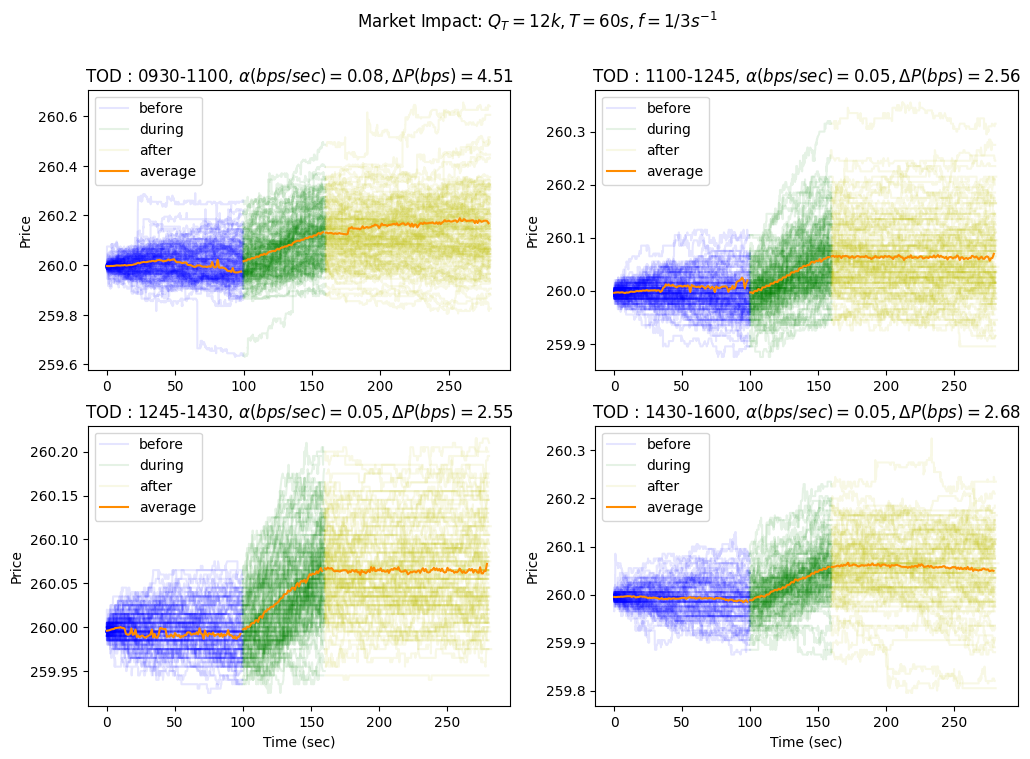

In [157]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,8))

for TOD in [0,1,2,3]:
    avg_b, avg_d, avg_a = [] ,[] , []
    ax = fig.add_subplot(2,2,TOD+1)
    for b,d,a in prices_sim[TOD]:
        for i, j in zip([b,d,a],[avg_b, avg_d, avg_a]):
            res = stats.binned_statistic(i[:,0], i[:,1], bins = np.arange(i[:,0][0],i[:,0][-1],1))
            j += [[res.bin_edges[:-1] - i[:,0][0], res.statistic]]
        ax.plot(b[:,0]- b[:,0][0], b[:,1], color="b", alpha = 0.1, label = "before")
        ax.plot(d[:,0]- b[:,0][0], d[:,1], color="g", alpha = 0.1, label = "during")
        ax.plot(a[:,0]- b[:,0][0], a[:,1], color="y", alpha = 0.1, label = "after")
    finalPrice = 0
    startPrice = 0 
    beta =0
    for avg_i, add in zip([avg_b, avg_d, avg_a], [0, 100, 160]):
        prices = {}
        for i, j in avg_i:
            for t, p in zip(i,j):
                if np.isnan(p): continue
                prices[np.round(t,decimals=2)] = prices.get(t, []) + [p]
        avg_prices = {}
        for k, v in prices.items():
            avg_prices[add + k] = np.mean(v)
        x = np.sort(list(avg_prices.keys()))
        y = [avg_prices[k] for k in x]
        if add == 100: 
            startPrice = y[0]
            finalPrice = y[-1]
            beta = stats.linregress(x - x[0], y/startPrice - 1).slope
        ax.plot(x, y , color = "darkorange", label = "average")
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1,2,len(handles)-1)
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display], loc = 'best')
    if TOD == 0: cat = "0930-1100"
    elif TOD == 3: cat = "1430-1600"
    elif TOD == 1: cat = "1100-1245"
    else: cat = "1245-1430"
    ax.set_title("TOD : " + cat + ", $\\alpha(bps/sec)= " + str(np.round(beta*10000, decimals = 2)) + ", \Delta P (bps)= " + str(np.round(1e4*(finalPrice - startPrice)/startPrice, decimals =2)) + "$")
    if TOD > 1: ax.set_xlabel("Time (sec)")
    ax.set_ylabel("Price")
fig.suptitle("Market Impact: $Q_T = 12k, T = 60s, f = 1/3 s^{-1}$")
plt.show()

## Q_T

In [2]:
import pickle
import os
prices_sim = {}
ric = "AAPL.OQ"
suffix = "_CLSLogLin"
dataPath = "/SAN/fca/Konark_PhD_Experiments/simulated/MI/Q_T"
for l in [dataPath + "/" + i for i in os.listdir(dataPath) if (ric in i)&(suffix in i)&("lo_top" in i)]:
    orderInitTime = float(l.split("_")[11])
    orderEndTime = orderInitTime + 60
    category = int(l.split("_")[-1])
    with open(l, "rb") as f:
        results = pickle.load(f)
    data = pd.DataFrame(results[1][1:])
    data = pd.DataFrame(np.array(list(map(list, list(data.values.flatten())))).reshape((data.values.shape[0], 8)), columns = ["Ask_touch_price", "Ask_touch_qty", "Bid_touch_price", "Bid_touch_qty", "Ask_deep_price", "Ask_deep_qty", "Bid_deep_price", "Bid_deep_qty"])
    data['Time'] = np.array(results[0][1:])[:,1].astype(float)
    data['mid'] = (data['Ask_touch_price'] + data['Bid_touch_price'])/2
    price_before = data.loc[data.Time < orderInitTime][['Time','mid']].values
    price_during = data.loc[(data.Time >= orderInitTime)&(data.Time <= orderEndTime)][['Time','mid']].values
    price_after = data.loc[data.Time > orderEndTime][['Time','mid']].values
    prices_sim[category] = prices_sim.get(category, []) + [[price_before, price_during, price_after]]

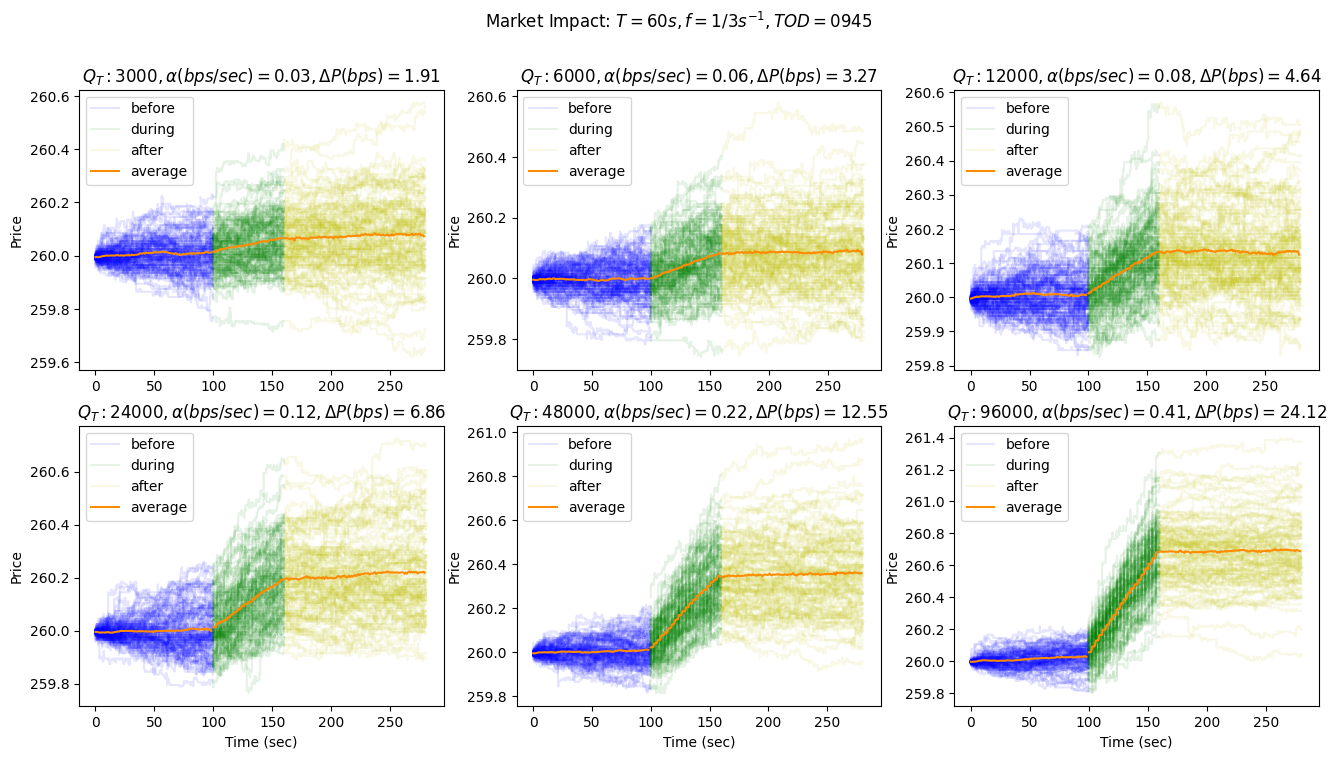

In [207]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,8))

for TOD in [0,1,2,3, 4, 5]:
    avg_b, avg_d, avg_a = [] ,[] , []
    ax = fig.add_subplot(2,3,TOD+1)
    for b,d,a in prices_sim[3000*(2**TOD)]:
        for i, j in zip([b,d,a],[avg_b, avg_d, avg_a]):
            res = stats.binned_statistic(i[:,0], i[:,1], bins = np.arange(i[:,0][0],i[:,0][-1],1))
            j += [[res.bin_edges[:-1] - i[:,0][0], res.statistic]]
        ax.plot(b[:,0]- b[:,0][0], b[:,1], color="b", alpha = 0.1, label = "before")
        ax.plot(d[:,0]- b[:,0][0], d[:,1], color="g", alpha = 0.1, label = "during")
        ax.plot(a[:,0]- b[:,0][0], a[:,1], color="y", alpha = 0.1, label = "after")
    finalPrice = 0
    startPrice = 0 
    beta =0
    for avg_i, add in zip([avg_b, avg_d, avg_a], [0, 100, 160]):
        prices = {}
        for i, j in avg_i:
            for t, p in zip(i,j):
                if np.isnan(p): continue
                prices[np.round(t,decimals=2)] = prices.get(t, []) + [p]
        avg_prices = {}
        for k, v in prices.items():
            avg_prices[add + k] = np.mean(v)
        x = np.sort(list(avg_prices.keys()))
        y = [avg_prices[k] for k in x]
        if add == 100: 
            startPrice = y[0]
            finalPrice = y[-1]
            beta = stats.linregress(x - x[0], y/startPrice - 1).slope
        ax.plot(x, y , color = "darkorange", label = "average")
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1,2,len(handles)-1)
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display], loc = 'best')
    
    ax.set_title("$Q_T : " + str(3000*(2**TOD)) + ", \\alpha(bps/sec)= " + str(np.round(beta*10000, decimals = 2)) + ", \Delta P (bps)= " + str(np.round(1e4*(finalPrice - startPrice)/startPrice, decimals =2)) + "$")
    if TOD > 2: ax.set_xlabel("Time (sec)")
    ax.set_ylabel("Price")
fig.suptitle("Market Impact: $T = 60s, f = 1/3 s^{-1}, TOD = 0945$")
plt.show()

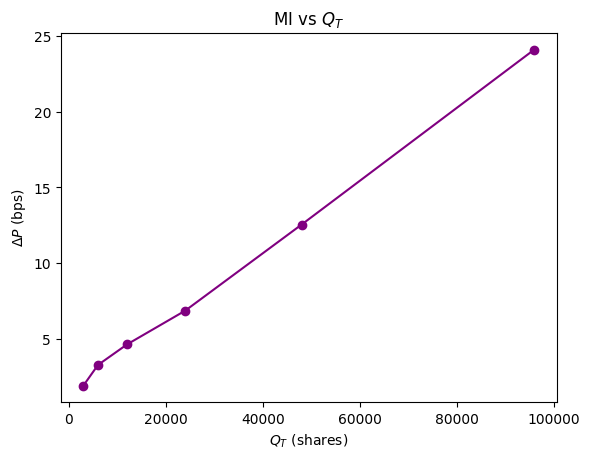

In [209]:
plt.plot([3000,6000,12000,24000, 48000, 96000], [ 1.91, 3.27, 4.63, 6.86, 12.55, 24.12], marker = "o", color = "purple")
plt.xlabel("$Q_T$ (shares)")
plt.ylabel("$\Delta P $ (bps)")
plt.title("MI vs $Q_T$")
plt.show()

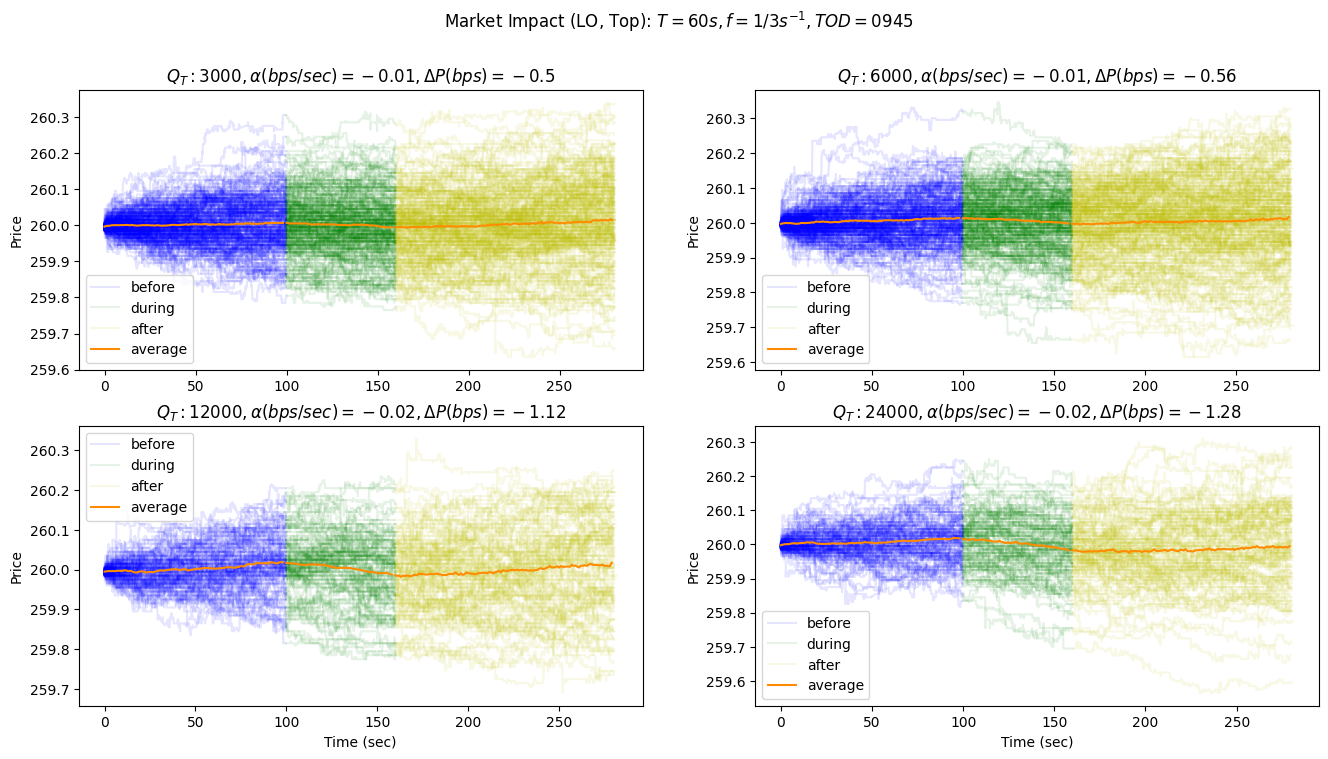

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,8))

for TOD in [0,1,2,3]:
    avg_b, avg_d, avg_a = [] ,[] , []
    ax = fig.add_subplot(2,2,TOD+1)
    for b,d,a in prices_sim[3000*(2**TOD)]:
        for i, j in zip([b,d,a],[avg_b, avg_d, avg_a]):
            res = stats.binned_statistic(i[:,0], i[:,1], bins = np.arange(i[:,0][0],i[:,0][-1],1))
            j += [[res.bin_edges[:-1] - i[:,0][0], res.statistic]]
        ax.plot(b[:,0]- b[:,0][0], b[:,1], color="b", alpha = 0.1, label = "before")
        ax.plot(d[:,0]- b[:,0][0], d[:,1], color="g", alpha = 0.1, label = "during")
        ax.plot(a[:,0]- b[:,0][0], a[:,1], color="y", alpha = 0.1, label = "after")
    finalPrice = 0
    startPrice = 0 
    beta =0
    for avg_i, add in zip([avg_b, avg_d, avg_a], [0, 100, 160]):
        prices = {}
        for i, j in avg_i:
            for t, p in zip(i,j):
                if np.isnan(p): continue
                prices[np.round(t,decimals=2)] = prices.get(t, []) + [p]
        avg_prices = {}
        for k, v in prices.items():
            avg_prices[add + k] = np.mean(v)
        x = np.sort(list(avg_prices.keys()))
        y = [avg_prices[k] for k in x]
        if add == 100: 
            startPrice = y[0]
            finalPrice = y[-1]
            beta = stats.linregress(x - x[0], y/startPrice - 1).slope
        ax.plot(x, y , color = "darkorange", label = "average")
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1,2,len(handles)-1)
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display], loc = 'best')
    
    ax.set_title("$Q_T : " + str(3000*(2**TOD)) + ", \\alpha(bps/sec)= " + str(np.round(beta*10000, decimals = 2)) + ", \Delta P (bps)= " + str(np.round(1e4*(finalPrice - startPrice)/startPrice, decimals =2)) + "$")
    if TOD > 1: ax.set_xlabel("Time (sec)")
    ax.set_ylabel("Price")
fig.suptitle("Market Impact (LO, Top): $T = 60s, f = 1/3 s^{-1}, TOD = 0945$")
plt.savefig("/SAN/fca/Konark_PhD_Experiments/simulated/MI/Q_T/lotop.png")
plt.show()

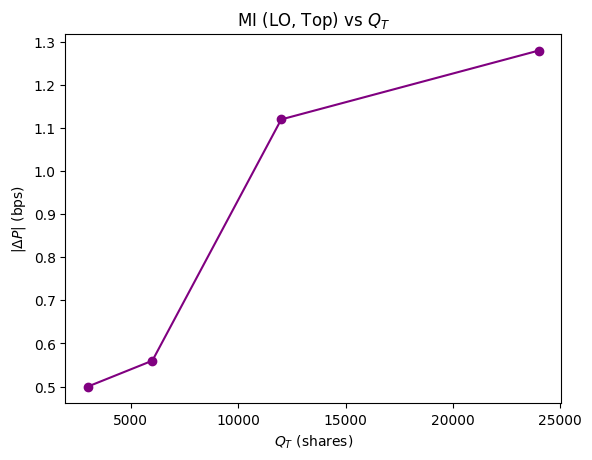

In [8]:
plt.plot([3000,6000,12000,24000], [ 0.5, 0.56, 1.12, 1.28], marker = "o", color = "purple")
plt.xlabel("$Q_T$ (shares)")
plt.ylabel("$|\Delta P| $ (bps)")
plt.title("MI (LO, Top) vs $Q_T$")
plt.savefig("/SAN/fca/Konark_PhD_Experiments/simulated/MI/Q_T/lotop_fit.png")
plt.show()


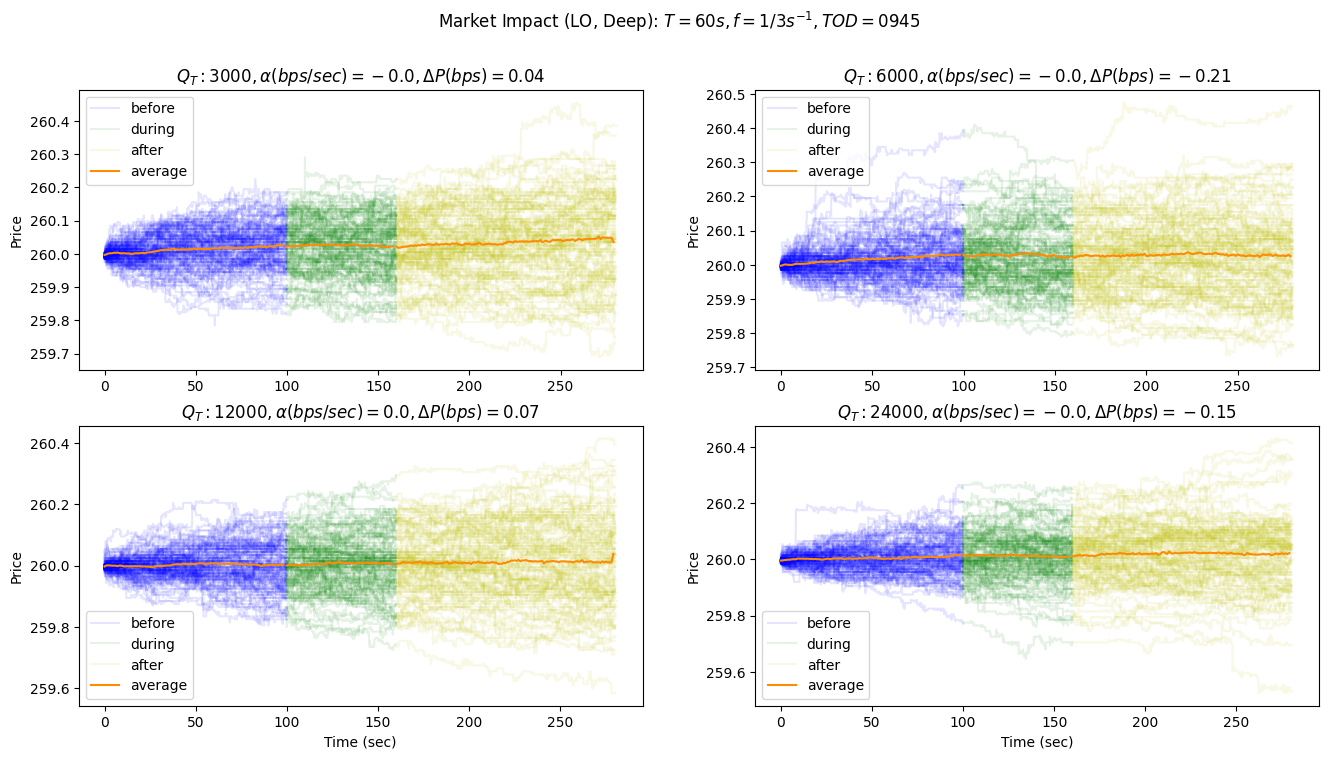

In [222]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,8))

for TOD in [0,1,2,3]:
    avg_b, avg_d, avg_a = [] ,[] , []
    ax = fig.add_subplot(2,2,TOD+1)
    for b,d,a in prices_sim[3000*(2**TOD)]:
        for i, j in zip([b,d,a],[avg_b, avg_d, avg_a]):
            res = stats.binned_statistic(i[:,0], i[:,1], bins = np.arange(i[:,0][0],i[:,0][-1],1))
            j += [[res.bin_edges[:-1] - i[:,0][0], res.statistic]]
        ax.plot(b[:,0]- b[:,0][0], b[:,1], color="b", alpha = 0.1, label = "before")
        ax.plot(d[:,0]- b[:,0][0], d[:,1], color="g", alpha = 0.1, label = "during")
        ax.plot(a[:,0]- b[:,0][0], a[:,1], color="y", alpha = 0.1, label = "after")
    finalPrice = 0
    startPrice = 0 
    beta =0
    for avg_i, add in zip([avg_b, avg_d, avg_a], [0, 100, 160]):
        prices = {}
        for i, j in avg_i:
            for t, p in zip(i,j):
                if np.isnan(p): continue
                prices[np.round(t,decimals=2)] = prices.get(t, []) + [p]
        avg_prices = {}
        for k, v in prices.items():
            avg_prices[add + k] = np.mean(v)
        x = np.sort(list(avg_prices.keys()))
        y = [avg_prices[k] for k in x]
        if add == 100: 
            startPrice = y[0]
            finalPrice = y[-1]
            beta = stats.linregress(x - x[0], y/startPrice - 1).slope
        ax.plot(x, y , color = "darkorange", label = "average")
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1,2,len(handles)-1)
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display], loc = 'best')
    
    ax.set_title("$Q_T : " + str(3000*(2**TOD)) + ", \\alpha(bps/sec)= " + str(np.round(beta*10000, decimals = 2)) + ", \Delta P (bps)= " + str(np.round(1e4*(finalPrice - startPrice)/startPrice, decimals =2)) + "$")
    if TOD > 1: ax.set_xlabel("Time (sec)")
    ax.set_ylabel("Price")
fig.suptitle("Market Impact (LO, Deep): $T = 60s, f = 1/3 s^{-1}, TOD = 0945$")
plt.show()

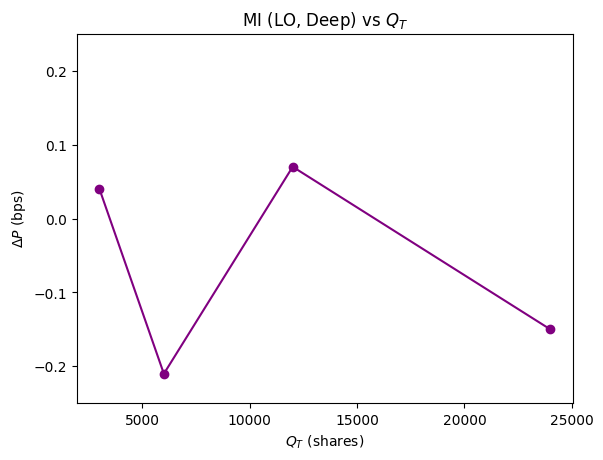

In [224]:
plt.plot([3000,6000,12000,24000], [ 0.04, -0.21, 0.07, -0.15], marker = "o", color = "purple")
plt.xlabel("$Q_T$ (shares)")
plt.ylabel("$\Delta P $ (bps)")
plt.ylim(-0.25, 0.25)
plt.title("MI (LO, Deep) vs $Q_T$")
plt.show()

## T

In [178]:
import pickle
import os
prices_sim = {}
ric = "AAPL.OQ"
suffix = "_CLSLogLin"
dataPath = "/SAN/fca/Konark_PhD_Experiments/simulated/MI/T"
for l in [dataPath + "/" + i for i in os.listdir(dataPath) if (ric in i)&(suffix in i)]:
    orderInitTime = float(l.split("_")[10])
    orderEndTime = orderInitTime + float(l.split("_")[-1])
    category = int(l.split("_")[-1])
    with open(l, "rb") as f:
        results = pickle.load(f)
    data = pd.DataFrame(results[1][1:])
    data = pd.DataFrame(np.array(list(map(list, list(data.values.flatten())))).reshape((data.values.shape[0], 8)), columns = ["Ask_touch_price", "Ask_touch_qty", "Bid_touch_price", "Bid_touch_qty", "Ask_deep_price", "Ask_deep_qty", "Bid_deep_price", "Bid_deep_qty"])
    data['Time'] = np.array(results[0][1:])[:,1].astype(float)
    data['mid'] = (data['Ask_touch_price'] + data['Bid_touch_price'])/2
    price_before = data.loc[data.Time < orderInitTime][['Time','mid']].values
    price_during = data.loc[(data.Time >= orderInitTime)&(data.Time <= orderEndTime)][['Time','mid']].values
    price_after = data.loc[data.Time > orderEndTime][['Time','mid']].values
    prices_sim[category] = prices_sim.get(category, []) + [[price_before, price_during, price_after]]

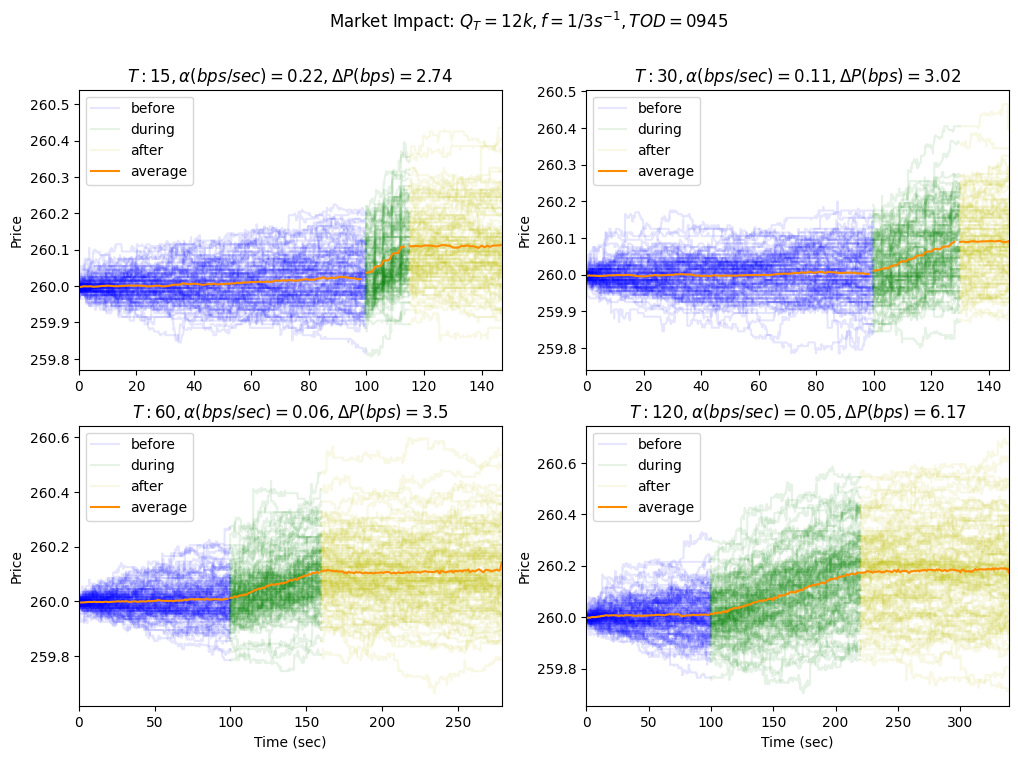

In [188]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,8))

for TOD in [0,1,2,3]:
    avg_b, avg_d, avg_a = [] ,[] , []
    ax = fig.add_subplot(2,2,TOD+1)
    for b,d,a in prices_sim[15*(2**TOD)]:
        for i, j in zip([b,d,a],[avg_b, avg_d, avg_a]):
            res = stats.binned_statistic(i[:,0], i[:,1], bins = np.arange(i[:,0][0],i[:,0][-1],1))
            j += [[res.bin_edges[:-1] - i[:,0][0], res.statistic]]
        ax.plot(b[:,0]- b[:,0][0], b[:,1], color="b", alpha = 0.1, label = "before")
        ax.plot(d[:,0]- b[:,0][0], d[:,1], color="g", alpha = 0.1, label = "during")
        ax.plot(a[:,0]- b[:,0][0], a[:,1], color="y", alpha = 0.1, label = "after")
    finalPrice = 0
    startPrice = 0 
    beta =0
    for avg_i, add in zip([avg_b, avg_d, avg_a], [0, 100, 100+15*(2**TOD)]):
        prices = {}
        for i, j in avg_i:
            for t, p in zip(i,j):
                if np.isnan(p): continue
                prices[np.round(t,decimals=2)] = prices.get(t, []) + [p]
        avg_prices = {}
        for k, v in prices.items():            
            if len(v) < 10: 
                continue
            avg_prices[add + k] = np.mean(v)
        x = np.sort(list(avg_prices.keys()))
        y = [avg_prices[k] for k in x]
        if add == 100: 
            startPrice = y[0]
            finalPrice = y[-1]
            beta = stats.linregress(x - x[0], y/startPrice - 1).slope
        ax.plot(x, y , color = "darkorange", label = "average")
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1,2,len(handles)-1)
    ax.set_xlim(0, max(x))
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display], loc = 'best')
    
    ax.set_title("$T : " + str(15*(2**TOD)) + ", \\alpha(bps/sec)= " + str(np.round(beta*10000, decimals = 2)) + ", \Delta P (bps)= " + str(np.round(1e4*(finalPrice - startPrice)/startPrice, decimals =2)) + "$")
    if TOD > 1: ax.set_xlabel("Time (sec)")
    ax.set_ylabel("Price")
fig.suptitle("Market Impact: $Q_T = 12k, f = 1/3 s^{-1}, TOD = 0945$")
plt.show()

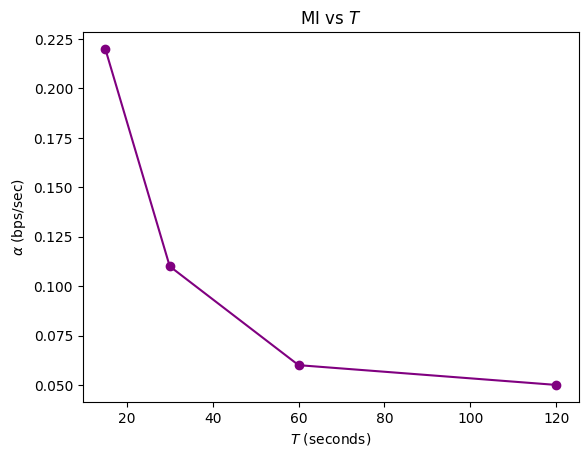

In [189]:
plt.plot([15,30,60,120], [ 0.22, 0.11, 0.06, 0.05], marker = "o", color = "purple")
plt.xlabel("$T$ (seconds)")
plt.ylabel("$\\alpha $ (bps/sec)")
plt.title("MI vs $T$")
plt.show()

## f

In [198]:
import pickle
import os
prices_sim = {}
ric = "AAPL.OQ"
suffix = "_CLSLogLin"
dataPath = "/SAN/fca/Konark_PhD_Experiments/simulated/MI/f"
for l in [dataPath + "/" + i for i in os.listdir(dataPath) if (ric in i)&(suffix in i)]:
    orderInitTime = float(l.split("_")[10])
    orderEndTime = orderInitTime + 60
    category = int(l.split("_")[-1])
    with open(l, "rb") as f:
        results = pickle.load(f)
    data = pd.DataFrame(results[1][1:])
    data = pd.DataFrame(np.array(list(map(list, list(data.values.flatten())))).reshape((data.values.shape[0], 8)), columns = ["Ask_touch_price", "Ask_touch_qty", "Bid_touch_price", "Bid_touch_qty", "Ask_deep_price", "Ask_deep_qty", "Bid_deep_price", "Bid_deep_qty"])
    data['Time'] = np.array(results[0][1:])[:,1].astype(float)
    data['mid'] = (data['Ask_touch_price'] + data['Bid_touch_price'])/2
    price_before = data.loc[data.Time < orderInitTime][['Time','mid']].values
    price_during = data.loc[(data.Time >= orderInitTime)&(data.Time <= orderEndTime)][['Time','mid']].values
    price_after = data.loc[data.Time > orderEndTime][['Time','mid']].values
    prices_sim[category] = prices_sim.get(category, []) + [[price_before, price_during, price_after]]

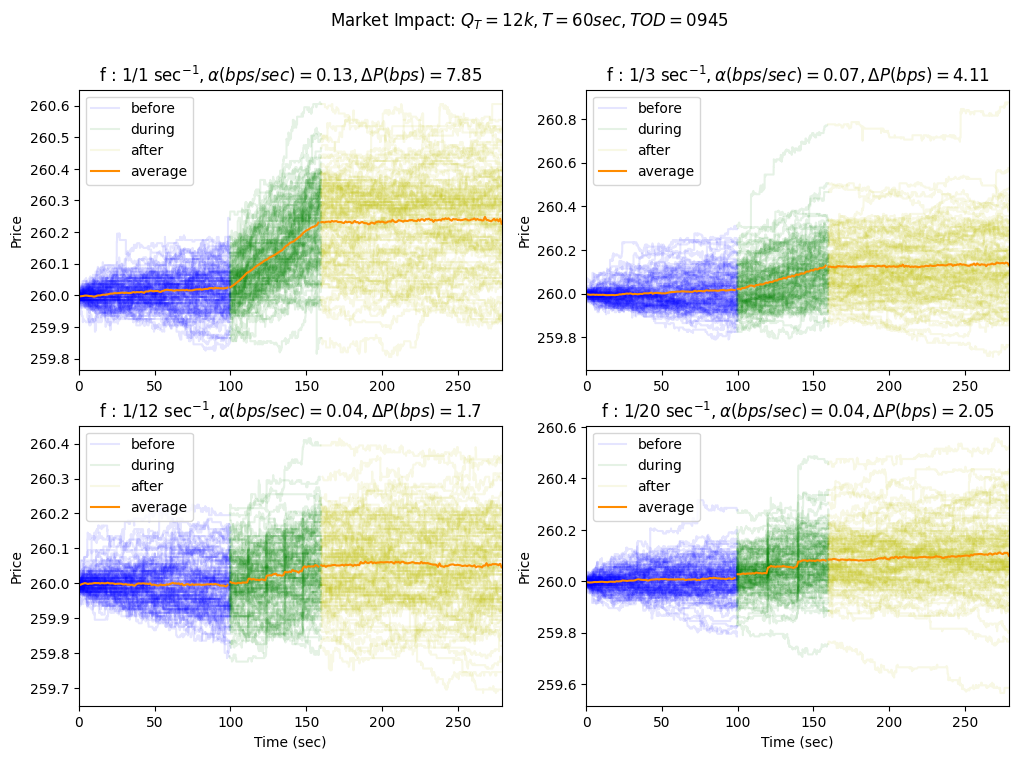

In [201]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,8))
fs = [1,3,12,20]
for TOD in [0,1,2,3]:
    avg_b, avg_d, avg_a = [] ,[] , []
    ax = fig.add_subplot(2,2,TOD+1)
    for b,d,a in prices_sim[fs[TOD]]:
        for i, j in zip([b,d,a],[avg_b, avg_d, avg_a]):
            res = stats.binned_statistic(i[:,0], i[:,1], bins = np.arange(i[:,0][0],i[:,0][-1],1))
            j += [[res.bin_edges[:-1] - i[:,0][0], res.statistic]]
        ax.plot(b[:,0]- b[:,0][0], b[:,1], color="b", alpha = 0.1, label = "before")
        ax.plot(d[:,0]- b[:,0][0], d[:,1], color="g", alpha = 0.1, label = "during")
        ax.plot(a[:,0]- b[:,0][0], a[:,1], color="y", alpha = 0.1, label = "after")
    finalPrice = 0
    startPrice = 0 
    beta =0
    for avg_i, add in zip([avg_b, avg_d, avg_a], [0, 100, 160]):
        prices = {}
        for i, j in avg_i:
            for t, p in zip(i,j):
                if np.isnan(p): continue
                prices[np.round(t,decimals=2)] = prices.get(t, []) + [p]
        avg_prices = {}
        for k, v in prices.items():            
            if len(v) < 10: 
                continue
            avg_prices[add + k] = np.mean(v)
        x = np.sort(list(avg_prices.keys()))
        y = [avg_prices[k] for k in x]
        if add == 100: 
            startPrice = y[0]
            finalPrice = y[-1]
            beta = stats.linregress(x - x[0], y/startPrice - 1).slope
        ax.plot(x, y , color = "darkorange", label = "average")
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1,2,len(handles)-1)
    ax.set_xlim(0, max(x))
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display], loc = 'best')
    
    ax.set_title("f : 1/" + str(fs[TOD]) + " sec$^{-1}, \\alpha(bps/sec)= " + str(np.round(beta*10000, decimals = 2)) + ", \Delta P (bps)= " + str(np.round(1e4*(finalPrice - startPrice)/startPrice, decimals =2)) + "$")
    if TOD > 1: ax.set_xlabel("Time (sec)")
    ax.set_ylabel("Price")
fig.suptitle("Market Impact: $Q_T = 12k, T = 60 sec, TOD = 0945$")
plt.show()

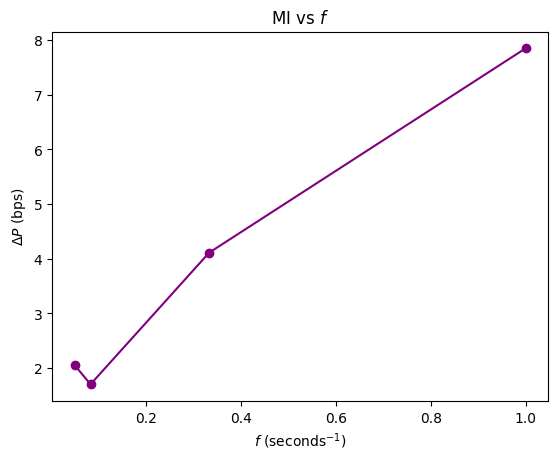

In [202]:
plt.plot([1, 1/3, 1/12, 1/20], [ 7.85, 4.11, 1.7 , 2.05], marker = "o", color = "purple")
plt.xlabel("$f$ (seconds$^{-1}$)")
plt.ylabel("$\Delta P $ (bps)")
plt.title("MI vs $f$")
plt.show()

# INTC / TSLA

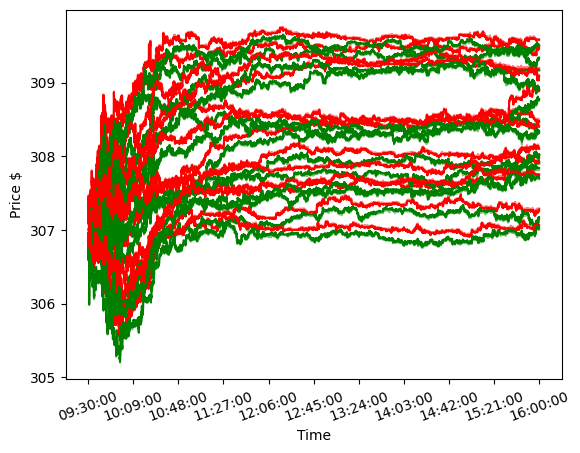

In [2]:
import time
import os
import matplotlib.pyplot as plt
import pickle
import numpy as np
dataPath = "/SAN/fca/Konark_PhD_Experiments/simulated/newMu"
ric = "TSLAdiffSp2.OQ"
suffix = "CLSLogLin_10"
paths = [dataPath + "/" + i for i in os.listdir(dataPath) if (ric in i)&(suffix in i)&(~("tmp" in i))]
spreads = []
for p in paths:
    resPath = p
    with open(resPath, 'rb') as f:
        results = pickle.load(f)
    
    ask_t = []
    bid_t = []
    ask_d = []
    bid_d= []
    spread = []
    for r in results[1]:
        ask_t.append(r['Ask_touch'][0])
        bid_t.append(r['Bid_touch'][0])
        ask_d.append(r['Ask_deep'][0])
        bid_d.append(r['Bid_deep'][0])
        spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
    
    t = np.append([0], np.array(results[0][1:])[:,1])
    t = t.astype(float) + 9.5*3600
    spreads.append([[t, spread]])
    plt.plot(t, ask_t, color = "r")
    plt.plot(t, ask_d, color="r", alpha = 0.5)
    plt.plot(t, bid_t, color="g")
    plt.plot(t, bid_d, color="g", alpha = 0.5)
count = int((max(t) - min(t))/10)
plt.xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.xlabel("Time")
plt.ylabel("Price $")
plt.show()

In [ ]:
ask_t_q = []
for r in results[1]:
        ask_t_q.append(r['Ask_touch'][1])
plt.plot(t, ask_t_q)
count = int((max(t) - min(t))/10)
plt.xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.xlabel("Time")

In [38]:
np.unique(np.array(results[0][50000:])[:,0], return_counts = True)

(array(['co_deep_Ask', 'co_deep_Bid', 'co_top_Ask', 'co_top_Bid',
        'lo_deep_Ask', 'lo_deep_Bid', 'lo_inspread_Ask', 'lo_inspread_Bid',
        'lo_top_Ask', 'lo_top_Bid', 'mo_Ask', 'mo_Bid'], dtype='<U32'),
 array([ 989,  919, 7757, 7840,  578,  357,  730,  946, 7154, 6196,  487,
         540]))

In [ ]:
spreads[0]

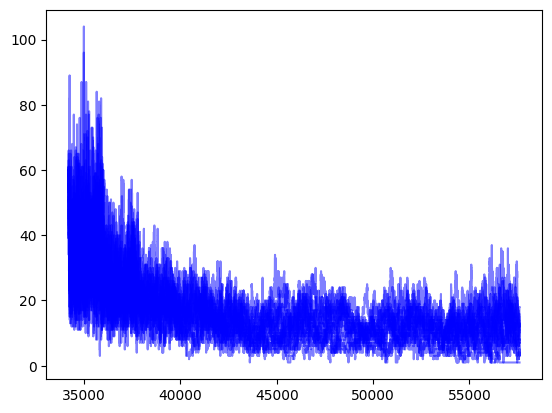

In [3]:
import pandas as pd
twaspreads  = []
for s in spreads:
    plt.plot(s[0][0], s[0][1], alpha = 0.5, color = "b")
    bins=np.digitize(s[0][0], np.arange(34200, 57600, 600))
    times = np.append([0], np.diff(s[0][0]))
    spread = np.array(s[0][1])
    spread = spread*times/600
    df = pd.DataFrame({"bins":bins, "spreads" : spread})
    twaspread = df.groupby("bins")["spreads"].sum().values
    twaspreads.append(twaspread)

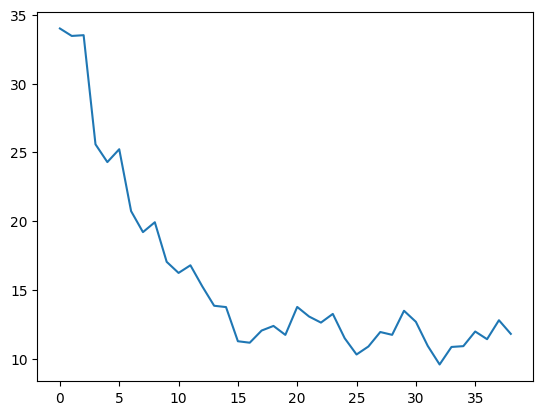

In [4]:
plt.plot(np.array(twaspreads).mean(axis=0))

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import sys
sys.path.append("/home/konajain/code/lobSimulations")
from hawkes import dataLoader
ric = "TSLA.OQ"
twaspreads  = []
for d in pd.date_range(dt.date(2019,1,2), dt.date(2019,3,31)):
            l = dataLoader.Loader(ric, d, d, nlevels = 2, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/")
            data = l.load()
            if len(data):
                for df in data:
                    df['spread'] = df['Ask Price 1'] - df['Bid Price 1']
                    s = df[['Time','spread']]
                    #s['Time'] = s['Time'].diff()
                    # spr = s.iloc[1:]
                    bins=np.digitize(s['Time'].values, np.arange(34200, 57600, 600))
                    times = np.append([0], np.diff(s['Time'].values))
                    spread = s['spread'].values
                    spread = spread*times/600
                    df = pd.DataFrame({"bins":bins, "spreads" : spread})
                    twaspread = df.groupby("bins")["spreads"].sum().values
                    if len(twaspread) == 39:
                        twaspreads.append(twaspread)

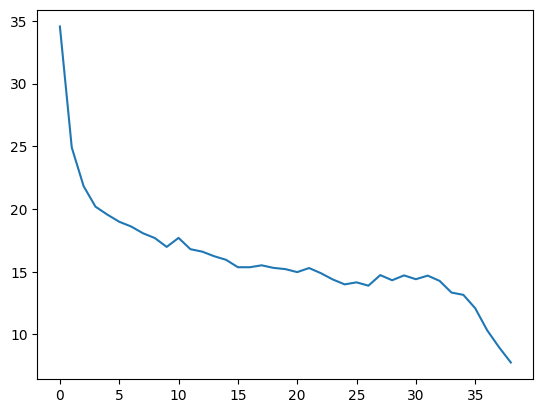

In [64]:
plt.plot(np.average(np.array(twaspreads2), axis = 0)*100)

In [65]:
np.average(np.array(twaspreads2), axis = 0)

array([0.3454566 , 0.24900061, 0.21815735, 0.20183234, 0.19550004,
       0.18981581, 0.18605408, 0.18065819, 0.17681923, 0.16976725,
       0.17693456, 0.1679435 , 0.16598197, 0.16233996, 0.15949083,
       0.15357347, 0.15354451, 0.15509575, 0.15304276, 0.15206269,
       0.1496746 , 0.15291044, 0.14880181, 0.1438044 , 0.13988903,
       0.14151297, 0.13886541, 0.14728355, 0.14319379, 0.14704306,
       0.144018  , 0.14686873, 0.14267605, 0.13337302, 0.13155948,
       0.12088318, 0.10343369, 0.0899046 , 0.07764547])

In [ ]:
for d in pd.date_range(dt.date(2019,1,2), dt.date(2019,3,31)):
            l = dataLoader.Loader(ric, d, d, nlevels = 2, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/")
            data = l.load()
            if len(data):
                for df in data:
                    df['spread'] = df['Ask Price 1'] - df['Bid Price 1']
                    s = df[['Time','spread']]
                    print(s.iloc[0])

In [62]:
twaspreads2 = []
for t in twaspreads:
    if len(t) == len(twaspreads[0]):
        twaspreads2.append(t)

# INTC Queue sizes:

In [501]:
import numpy as np
import pandas as pd
import datetime as dt
import sys
sys.path.append("/home/konajain/code/lobSimulations")
from hawkes import dataLoader
ric = "INTC.OQ"
twaqueues  = []
for d in pd.date_range(dt.date(2019,1,2), dt.date(2019,3,31)):
            l = dataLoader.Loader(ric, d, d, nlevels = 2, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/")
            data = l.load()
            if len(data):
                for df in data:
                    s = df[['Bid Size 1','Time']]
                    bins=np.digitize(s['Time'].values, np.arange(34200, 57600, 600))
                    times = np.append([0], np.diff(s['Time'].values))
                    queue = s['Bid Size 1'].values
                    queue = queue*times/600
                    df = pd.DataFrame({"bins":bins, "queue" : queue})
                    twaqueue = df.groupby("bins")["queue"].sum().values
                    if len(twaqueue) == 39:
                        twaqueues.append(twaqueue)

/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-02_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-03_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-04_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-07_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-08_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-09_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-10_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-11_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-14_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-15_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-16_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-17_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-18_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-22_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-23_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-24_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-25_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-28_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-29_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-30_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-31_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-01_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-04_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-05_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-06_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-07_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-08_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-11_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-12_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-13_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-14_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-15_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-19_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-20_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-21_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-22_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-25_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-26_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-27_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-02-28_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-01_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-04_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-05_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-06_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-07_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-08_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-11_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-12_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-13_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-14_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-15_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-18_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-19_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-20_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-21_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-22_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-25_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-26_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2018497212.py:11: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-27_34200000_57600000_message_10.csv
/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-28_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-03-29_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


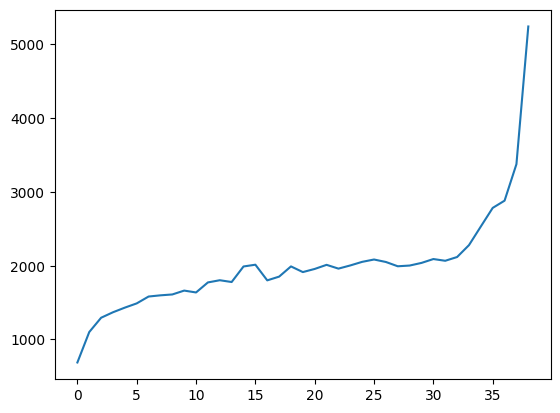

In [502]:
plt.plot(np.average(np.array(twaqueues), axis = 0))

In [531]:
l = dataLoader.Loader(ric, dt.date(2019,1,2), dt.date(2019,1,2), nlevels = 2, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/")
data = l.load()

/SAN/fca/Konark_PhD_Experiments/extracted/INTC_2019-01-02_34200000_57600000_message_10.csv


/tmp/ipykernel_8149/2703867450.py:2: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data = l.load()
/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


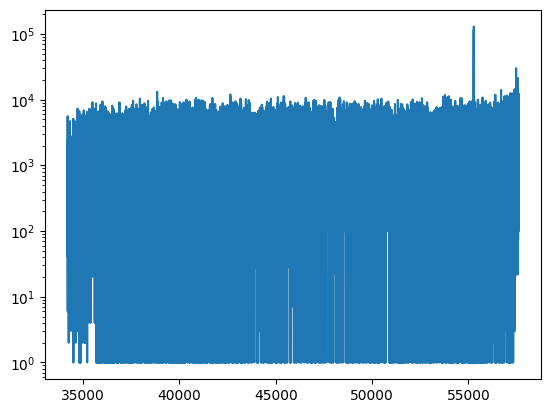

In [536]:
plt.plot(data[0]['Time'], data[0]['Ask Size 1'])
plt.yscale("log")

# Rough

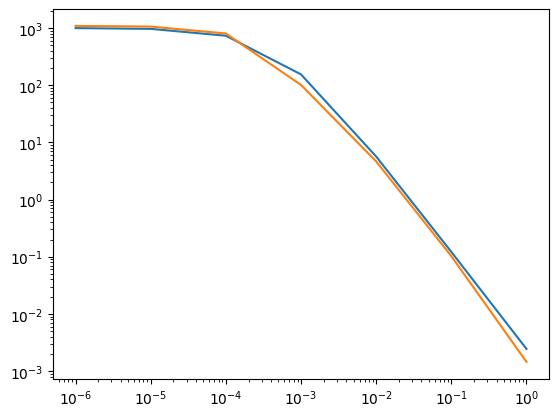

In [647]:
alpha = 1e3
gamma = 2e3
beta = 1.7
t = 10.**(-1*np.arange(7))
plt.plot(t, alpha*(1+gamma*t)**(-1*beta))
# plt.plot(t, alpha*10.**(-1*beta)*np.exp(0.9*beta - 0.1*beta*gamma*t))
# gamma = 4e3
plt.plot(t, alpha*np.exp(-1*beta*gamma*t) + alpha*10.**(-1*beta)*np.exp(0.9*beta - 0.1*beta*gamma*t) + alpha*10.**(-2*beta)*np.exp(0.99*beta - 0.01*beta*gamma*t) + alpha*10.**(-3*beta)*np.exp(0.999*beta - 0.001*beta*gamma*t)  )

plt.yscale("log")
plt.xscale("log")

In [646]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/AAPL.OQ_ParamsInferredWCutoffEyeMu_2019-01-02_2019-12-31_CLSLogLin_10", "rb") as f:
    params = pickle.load(f)
with open("/SAN/fca/Konark_PhD_Experiments/extracted/AAPL.OQ_Params_2019-01-02_2019-12-30_dictTOD", "rb") as f:
    tod = pickle.load(f)

In [642]:
for k, v in params.items():
    if "->" in k:
        print(k, v[1][1]*v[1][2])

lo_deep_Ask->lo_deep_Ask 2897.9538767093572
co_deep_Ask->lo_deep_Ask 6842.602377224962
lo_top_Ask->lo_deep_Ask 11587.502504849383
co_top_Ask->lo_deep_Ask 3069.677667440424
mo_Ask->lo_deep_Ask 2043.5288273787914
lo_inspread_Ask->lo_deep_Ask 11867.98376519224
lo_inspread_Bid->lo_deep_Ask 4968.690038785663
mo_Bid->lo_deep_Ask 7074.993974769318
co_top_Bid->lo_deep_Ask 11454.739089362996
lo_top_Bid->lo_deep_Ask 3953.601929431262
co_deep_Bid->lo_deep_Ask 6883.72804007371
lo_deep_Bid->lo_deep_Ask 2767.182829280656
lo_deep_Ask->co_deep_Ask 4019.2961548311846
co_deep_Ask->co_deep_Ask 4628.048433687368
lo_top_Ask->co_deep_Ask 2899.0670534011124
co_top_Ask->co_deep_Ask 2421.5137607831884
mo_Ask->co_deep_Ask 6090.511795959416
lo_inspread_Ask->co_deep_Ask 16260.143003450734
lo_inspread_Bid->co_deep_Ask 2878.92360919942
mo_Bid->co_deep_Ask 4695.740216777142
co_top_Bid->co_deep_Ask 8580.756009392122
lo_top_Bid->co_deep_Ask 11881.776317120768
co_deep_Bid->co_deep_Ask 4000.2756272009215
lo_deep_Bid->co

In [668]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/INTC.OQ_2019-01-10_2019-01-10_MLE_commonDecay_12D", "rb") as f:
    coefs = pickle.load(f)
coefs

(array([0.        , 0.        , 1.66657722, 1.50431668, 0.45799344,
        0.35476727, 0.08807703, 0.08911369, 0.05657941, 0.15676631,
        0.271543  , 0.26127867]),
 array([0.00000000e+00, 0.00000000e+00, 1.66657722e+00, 1.50431668e+00,
        4.57993442e-01, 3.54767272e-01, 8.80770304e-02, 8.91136920e-02,
        5.65794104e-02, 1.56766314e-01, 2.71542997e-01, 2.61278674e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.90895668e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00

In [670]:
cols

['lo_deep_Ask',
 'co_deep_Ask',
 'lo_top_Ask',
 'co_top_Ask',
 'mo_Ask',
 'lo_inspread_Ask',
 'lo_inspread_Bid',
 'mo_Bid',
 'co_top_Bid',
 'lo_top_Bid',
 'co_deep_Bid',
 'lo_deep_Bid']

In [9]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/AMZN.OQ_ParamsInferredWCutoffEyeMu_2019-01-02_2019-12-31_CLSLogLin_10", "rb") as f:
    params = pickle.load(f)

In [12]:
for c in ["lo_deep_", "co_deep_", "lo_top_","co_top_", "mo_", "lo_inspread_" ]:
    c1 = c + "Ask"
    c2 = c+"Bid"
    for c in cols:
        side = "Ask" if "Bid" in c else "Bid"
        params[c[:-3] + side + "->" + c1] = params.get(c + "->" + c2, None)

In [13]:
params

{'lo_deep_Ask': 0.8607102465166327,
 'lo_deep_Ask->lo_deep_Ask': (1.0,
  array([1.05171092e+03, 1.70000000e+00, 3.38811402e+03])),
 'co_deep_Ask->lo_deep_Ask': (-1.0,
  array([1.59674972e+02, 1.70000000e+00, 2.59105809e+03])),
 'lo_top_Ask->lo_deep_Ask': (-1.0,
  array([4.10340473e+02, 1.70000000e+00, 4.14271178e+03])),
 'co_top_Ask->lo_deep_Ask': (-1.0,
  array([3.44194307e+02, 1.70000000e+00, 2.83354543e+03])),
 'mo_Ask->lo_deep_Ask': (1.0, array([0.0044595 , 1.7       , 0.44901283])),
 'lo_inspread_Ask->lo_deep_Ask': (1.0,
  array([1.26658116e+03, 1.70000000e+00, 7.92023351e+03])),
 'lo_inspread_Bid->lo_deep_Ask': (-1.0,
  array([6.73733399e+02, 1.70000000e+00, 2.62162946e+03])),
 'mo_Bid->lo_deep_Ask': (1.0,
  array([2.55233812e+02, 1.70000000e+00, 8.18445254e+03])),
 'co_top_Bid->lo_deep_Ask': (1.0,
  array([1.27193122e+02, 1.70000000e+00, 3.79759514e+03])),
 'lo_top_Bid->lo_deep_Ask': (1.0, array([0.01203056, 1.7       , 0.48632495])),
 'co_deep_Bid->lo_deep_Ask': (-1.0,
  array(

In [14]:
with open("/SAN/fca/Konark_PhD_Experiments/extracted/AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10", "wb") as f:
    pickle.dump(params, f)

In [686]:
np.random.randint(0,23400)

686

/SAN/fca/Konark_PhD_Experiments/simulated/oneYear/AAPLSymm2.OQ_ResultsWCutoff_2019-01-02_2019-03-31_CLSLogLin_10_noAdj_13
/SAN/fca/Konark_PhD_Experiments/simulated/oneYear/AAPLSymm2.OQ_ResultsWCutoff_2019-01-02_2019-03-31_CLSLogLin_10_noAdj_9
/SAN/fca/Konark_PhD_Experiments/simulated/oneYear/AAPLSymm2.OQ_ResultsWCutoff_2019-01-02_2019-03-31_CLSLogLin_10_noAdj_47
/SAN/fca/Konark_PhD_Experiments/simulated/oneYear/AAPLSymm2.OQ_ResultsWCutoff_2019-01-02_2019-03-31_CLSLogLin_10_noAdj_11
/SAN/fca/Konark_PhD_Experiments/simulated/oneYear/AAPLSymm2.OQ_ResultsWCutoff_2019-01-02_2019-03-31_CLSLogLin_10_noAdj_15
/SAN/fca/Konark_PhD_Experiments/simulated/oneYear/AAPLSymm2.OQ_ResultsWCutoff_2019-01-02_2019-03-31_CLSLogLin_10_noAdj_19
/SAN/fca/Konark_PhD_Experiments/simulated/oneYear/AAPLSymm2.OQ_ResultsWCutoff_2019-01-02_2019-03-31_CLSLogLin_10_noAdj_27
/SAN/fca/Konark_PhD_Experiments/simulated/oneYear/AAPLSymm2.OQ_ResultsWCutoff_2019-01-02_2019-03-31_CLSLogLin_10_noAdj_35
/SAN/fca/Konark_PhD_Exper

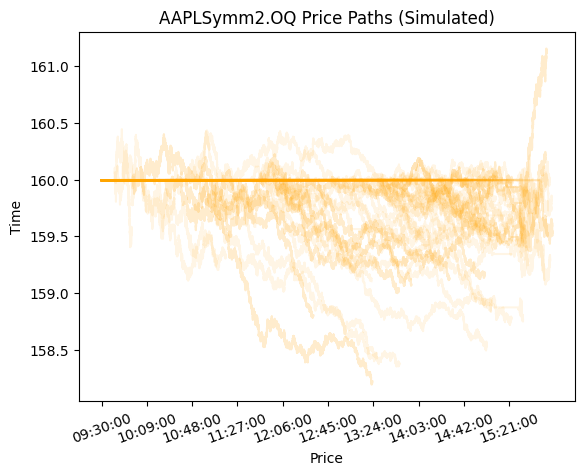

In [143]:
import time
simMids = []
simTimes = []
simSpreads = []
simRets = []
ric = "AAPLSymm2.OQ"
suffix = "_CLSLogLin_10"
dataPath = "/SAN/fca/Konark_PhD_Experiments/simulated/oneYear"
paths = [dataPath + "/" + i for i in os.listdir(dataPath) if (ric in i)&(suffix in i)&(~("tmp" in i))]
for path in paths:
        print(path)
        tryer= 0
        while tryer < 5: # retry on pickle clashes
            try:
                with open(path, "rb") as f:
                    results = pickle.load(f)
                tryer = 6
            except:
                time.sleep(1)
                tryer +=1
        simDf = pd.DataFrame(results[1])
        simDf['Ask'] = simDf['Ask_touch'].apply(lambda x: x[0])
        simDf['Bid'] =  simDf['Bid_touch'].apply(lambda x: x[0])
        simDf['Mid'] = 0.5*(simDf['Ask'] + simDf['Bid'])
        mid = simDf.Mid.values
        simMids.append(mid)
        simTimes.append(np.append([0], np.array(results[0][1:])[:,1]).astype(float) + 9.5*3600)
        simDf['Spread'] = simDf['Ask'] - simDf['Bid']
        mid = simDf.Mid.values
        times = np.append([0], np.array(results[0][1:])[:,1])
        simSpreads.append(simDf.Spread.values)
if True:
    fig = plt.figure()
    plt.title(ric + " Price Paths (Simulated)")
    plt.xlabel("Price")
    plt.ylabel("Time")
    alpha = 0.1
    count = 0
    for r, t in zip(simMids, simTimes):
        if (count < 10)&(np.random.uniform() < 0.01):
            alpha = 0.5
            count +=1
        plt.plot(t, r, color = "orange", alpha=alpha)
    count = 23400
    plt.xticks(ticks = 9.5*3600 + np.arange(0, count, 2340), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in 9.5*3600 + np.arange(0, count, 2340)], rotation = 20)

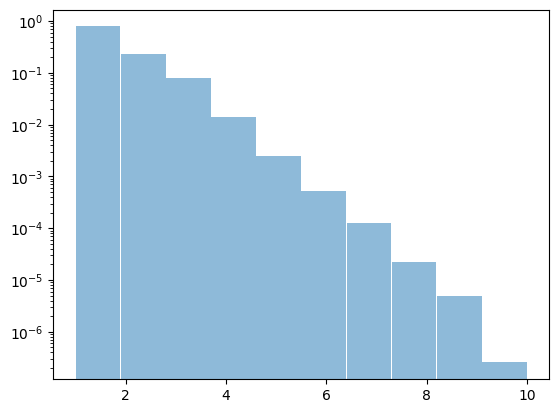

In [142]:
histSim, binsSim = np.histogram(100*np.hstack(simSpreads), density =True)
# histSim[np.where(histSim <= 1e-4)] = 0
binsSim = binsSim[np.append(np.where(histSim > 0)[0], [np.where(histSim > 0)[0][-1]+1])]
histSim = histSim[np.where(histSim > 0)]
width = 0.99* (binsSim[1] - binsSim[0])
center = (binsSim[:-1] + binsSim[1:]) / 2
plt.bar(center, histSim,align='center', width=width, label = "Simulated", alpha = 0.5)
plt.yscale("log")

(array([ 542390., 1300211., 1815976., 1642992., 1533242., 1646566.,
        1286757., 1133637., 1408999., 1614290., 1582879., 1586672.,
        2565134.]),
 array([ 0.        ,  0.92307692,  1.84615385,  2.76923077,  3.69230769,
         4.61538462,  5.53846154,  6.46153846,  7.38461538,  8.30769231,
         9.23076923, 10.15384615, 11.07692308, 12.        ]),
 <BarContainer object of 13 artists>)

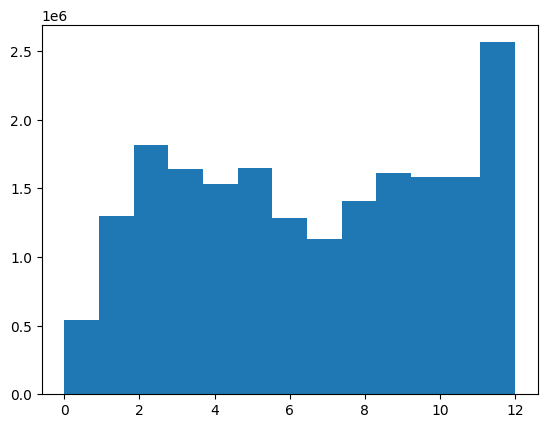

In [116]:
plt.hist(np.hstack([(i - 34200)//(1800) for i in simTimes]), bins =13)

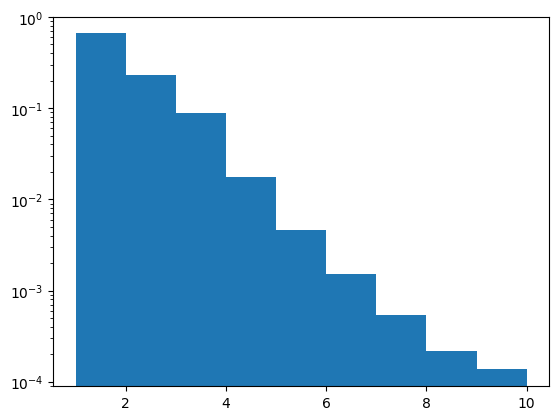

In [132]:
simTimeIds = np.hstack([(i[1:]- 34200)//(1800) for i in simTimes])
plt.hist(np.round(100*np.hstack([i[1:] for i in simSpreads]))[np.where(simTimeIds == 0)], bins = binsSim, density = True)
plt.yscale("log")

In [128]:
simTimeIds = np.hstack([(i[1:]- 34200)//(1800) for i in simTimes])
if True:
    ids, counts = np.unique(simTimeIds, return_counts =True)
    counts = counts/sum(counts)
    dictNorm = {}
    for i, c in zip(ids, counts):
        dictNorm[i] = 1/(13*c)
    wts = [dictNorm[i] for i in simTimeIds]
    freq, binsSim = np.histogram(np.round(100*np.hstack([i[1:] for i in simSpreads])), bins = np.unique(np.round(100*np.hstack(simSpreads))), weights = wts, density=True)
    histSim = freq/sum(freq)

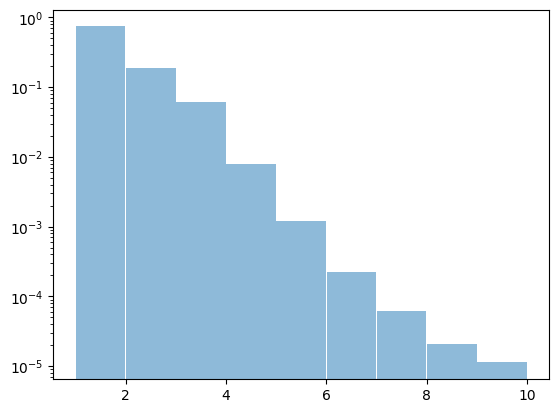

In [129]:
width = 0.99* (binsSim[1] - binsSim[0])
center = (binsSim[:-1] + binsSim[1:]) / 2
plt.bar(center, histSim,align='center', width=width, label = "Simulated", alpha = 0.5)
plt.yscale("log")

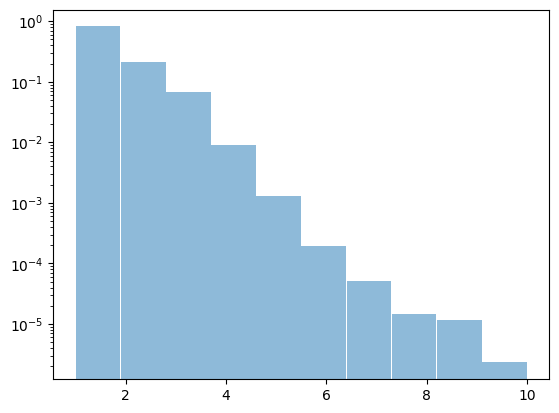

In [86]:
histSim, binsSim = np.histogram(100*np.hstack(simSpreads), density =True)
# histSim[np.where(histSim <= 1e-4)] = 0
binsSim = binsSim[np.append(np.where(histSim > 0)[0], [np.where(histSim > 0)[0][-1]+1])]
histSim = histSim[np.where(histSim > 0)]
width = 0.99* (binsSim[1] - binsSim[0])
center = (binsSim[:-1] + binsSim[1:]) / 2
plt.bar(center, histSim, align='center', width=width, label = "Simulated", alpha = 0.5)
plt.yscale("log")

In [65]:
histSim, binsSim = np.histogram(100*np.hstack(simSpreads), bins=len(np.unique(np.hstack(simSpreads))), density =True)

In [66]:
histSim

array([1.03352095e+00, 0.00000000e+00, 6.62554068e-01, 0.00000000e+00,
       4.16957087e-01, 0.00000000e+00, 1.36595052e-01, 0.00000000e+00,
       0.00000000e+00, 3.06059401e-02, 0.00000000e+00, 5.02480794e-03,
       0.00000000e+00, 4.48178782e-04, 0.00000000e+00, 8.20056642e-06])

In [67]:
binsSim

array([1.    , 1.4375, 1.875 , 2.3125, 2.75  , 3.1875, 3.625 , 4.0625,
       4.5   , 4.9375, 5.375 , 5.8125, 6.25  , 6.6875, 7.125 , 7.5625,
       8.    ])